<a href="https://colab.research.google.com/github/saurabhdburde/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

#### <b> The df contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

<br>
<br>
<br>
<br>

#<b><u> 1. Import Required Libraries</b>

In [1]:
# Import all libraries
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                # linear algebra
import matplotlib.pyplot as plt   # ploting the data
import seaborn as sns             # ploting the data
import math                       # calculation
from matplotlib import rcParams   # runtime configuration settings
%matplotlib inline

import pylab

from datetime import datetime
import calendar

from scipy import stats
import missingno as msno

# multicollinearity with Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklearn Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ML Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold


# Cross validation
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

# PipeLine
from sklearn.pipeline import make_pipeline

# linear regression model from statsmodels.api
import statsmodels.api as sm

# Import Warnig Lib
import warnings                 
warnings.filterwarnings('ignore') # Ignore unnecessary warnings

# figure size in inches
rcParams['figure.figsize'] = 15,8




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Display the values on a barplot

In [2]:
# the following function to display the values on a seaborn barplot
def show_values(axs, orient="v", space=.01):
  """
  function to display the values on a seaborn barplot
  """
  # Create a another function to pass plot name
  def _single(ax):
    # if Plot is Vertical 
    if orient == "v":
        for p in ax.patches:
          # Patches are Artists with a face color and an edge color.
          # We are using it to get hight and width of the bar or count plot
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + (p.get_height()*0.02)
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    # if plot is horizontal
    elif orient == "h":
        for p in ax.patches:
          # Patches are Artists with a face color and an edge color.
          # We are using it to get hight and width of the bar or count plot
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.1f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

  # function returns True if the specified object is of the np.ndarray type, otherwise False . 
  if isinstance(axs, np.ndarray):
    # Multidimensional index iterator. Return an iterator yielding pairs of array coordinates and values.
    for idx, ax in np.ndenumerate(axs):
        _single(ax)
  else:
    _single(axs)

<br>
<br>
<br>
<br>

#<b><u> 2. Importation and Exploration of AirBnb NYC df</u></b>




### [ i ] - Import df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Alma Better Capstone Projects/CP2-Bike Sharing Demand Prediction/Data _ Resources/SeoulBikeData.csv',encoding= 'unicode_escape').replace([np.inf, -np.inf], np.nan)

### [ ii ] - Overview Of df

In [5]:
# Top 5 records
data.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [6]:
# Size of df
print('\nSize of the df:-')
print(f' <o>  Number of Features (Columns) in df are {data.shape[1]}.')
print(f' <o>  Number of Records (Rows) in df are {data.shape[0]}.')


Size of the df:-
 <o>  Number of Features (Columns) in df are 14.
 <o>  Number of Records (Rows) in df are 8760.


In [7]:
# Data Description
data.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [8]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Unique values are present for each Feature.
print('\nUnique Values for each individual Columns:-\n\n', data.nunique())


Unique Values for each individual Columns:-

 Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


In [10]:
# Count missing values for each column of the data
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
df = data.copy()

<br>
<br>
<br>
<br>

#<b><u>Data Preprocessing</u></b>

## [ i ] - Creating new features Year, Month, Day using Date column from the df 

In [12]:
df["day"] = df.Date.apply(lambda x : int(x.split("/")[0]))
df["month"] = df.Date.apply(lambda x : int(x.split("/")[1]))
df["year"] = df.Date.apply(lambda x : int(x.split("/")[2]))
df["weekday"] = df.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%d/%m/%Y").weekday()])

In [13]:

df.head()

Date  Rented Bike Count  Hour  ...  month  year  weekday
0  01/12/2017                254     0  ...     12  2017   Friday
1  01/12/2017                204     1  ...     12  2017   Friday
2  01/12/2017                173     2  ...     12  2017   Friday
3  01/12/2017                107     3  ...     12  2017   Friday
4  01/12/2017                 78     4  ...     12  2017   Friday

[5 rows x 18 columns]

In [14]:
df.head()

Date  Rented Bike Count  Hour  ...  month  year  weekday
0  01/12/2017                254     0  ...     12  2017   Friday
1  01/12/2017                204     1  ...     12  2017   Friday
2  01/12/2017                173     2  ...     12  2017   Friday
3  01/12/2017                107     3  ...     12  2017   Friday
4  01/12/2017                 78     4  ...     12  2017   Friday

[5 rows x 18 columns]

In [15]:
df.drop("Date", axis=1, inplace=True)

In [16]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'weekday'],
      dtype='object')

## EDA

In [17]:
# find All columns That Are Objects
Numeric_Features = df.dtypes[df.dtypes != 'object'].index
Numeric_Features[:]

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'year'],
      dtype='object')



 Distribution and Bike Count Comparision Plot for Rented Bike Count
------------------------------------------------------------------------------------------------------------------------------------------------------


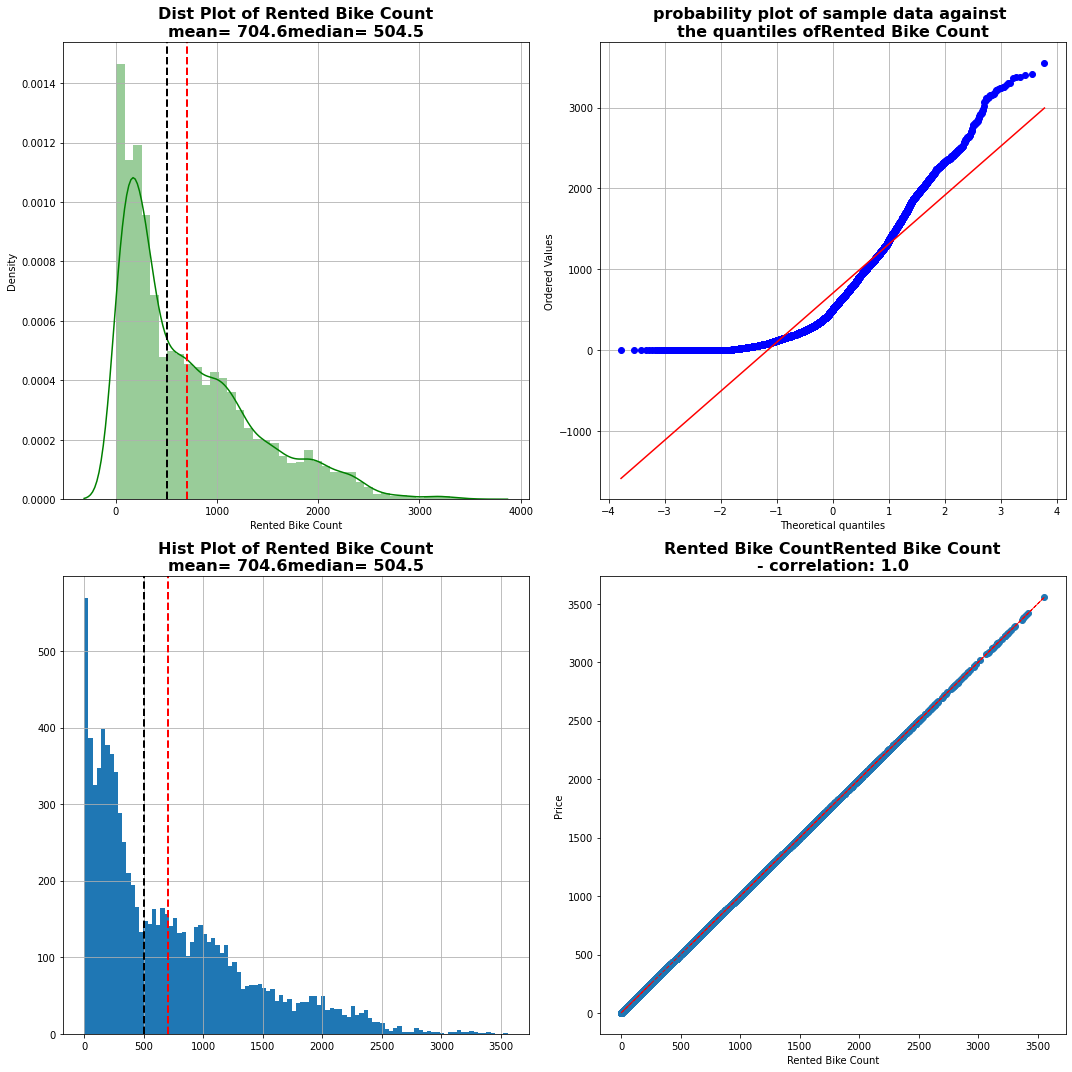



 Distribution and Bike Count Comparision Plot for Hour
------------------------------------------------------------------------------------------------------------------------------------------------------


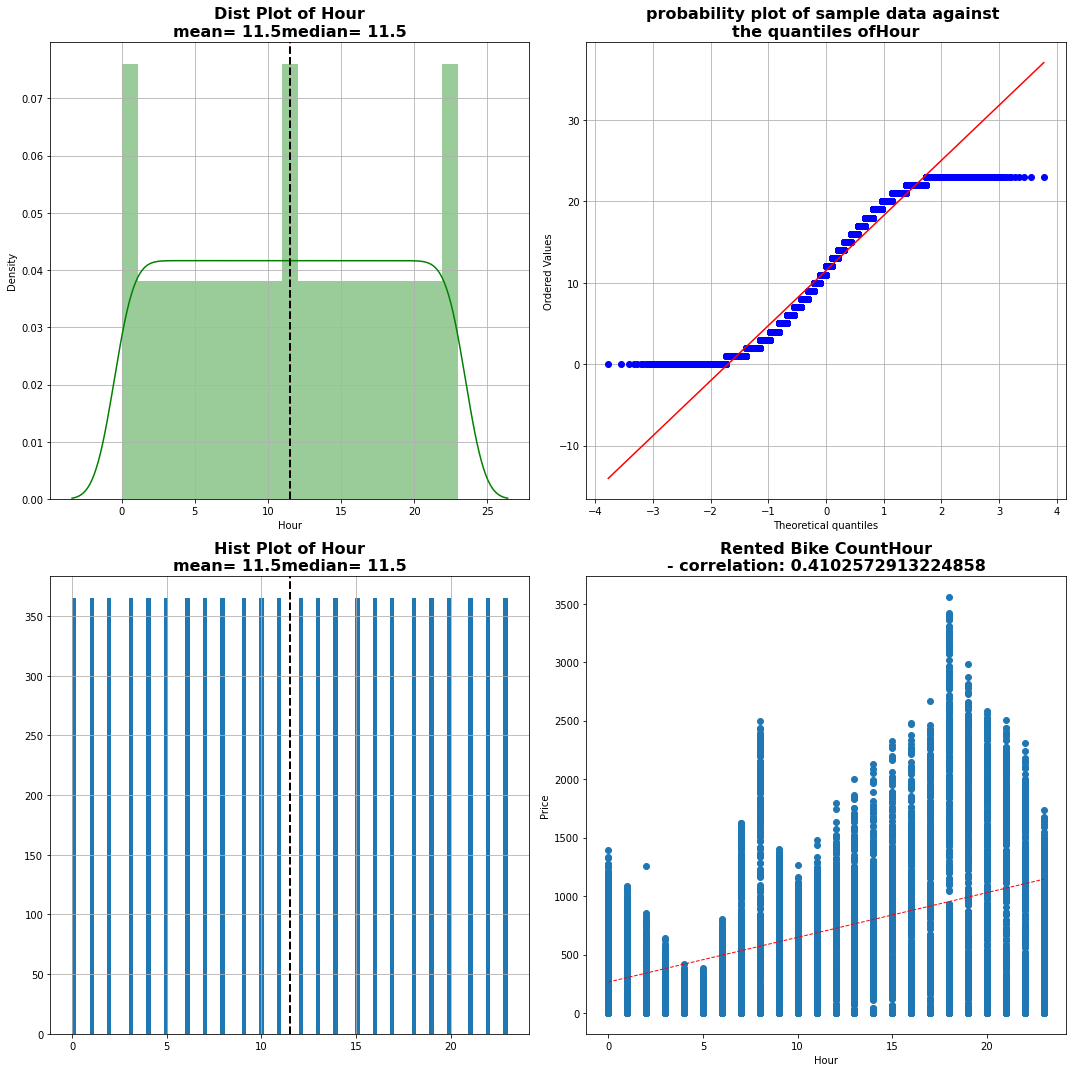



 Distribution and Bike Count Comparision Plot for Temperature(°C)
------------------------------------------------------------------------------------------------------------------------------------------------------


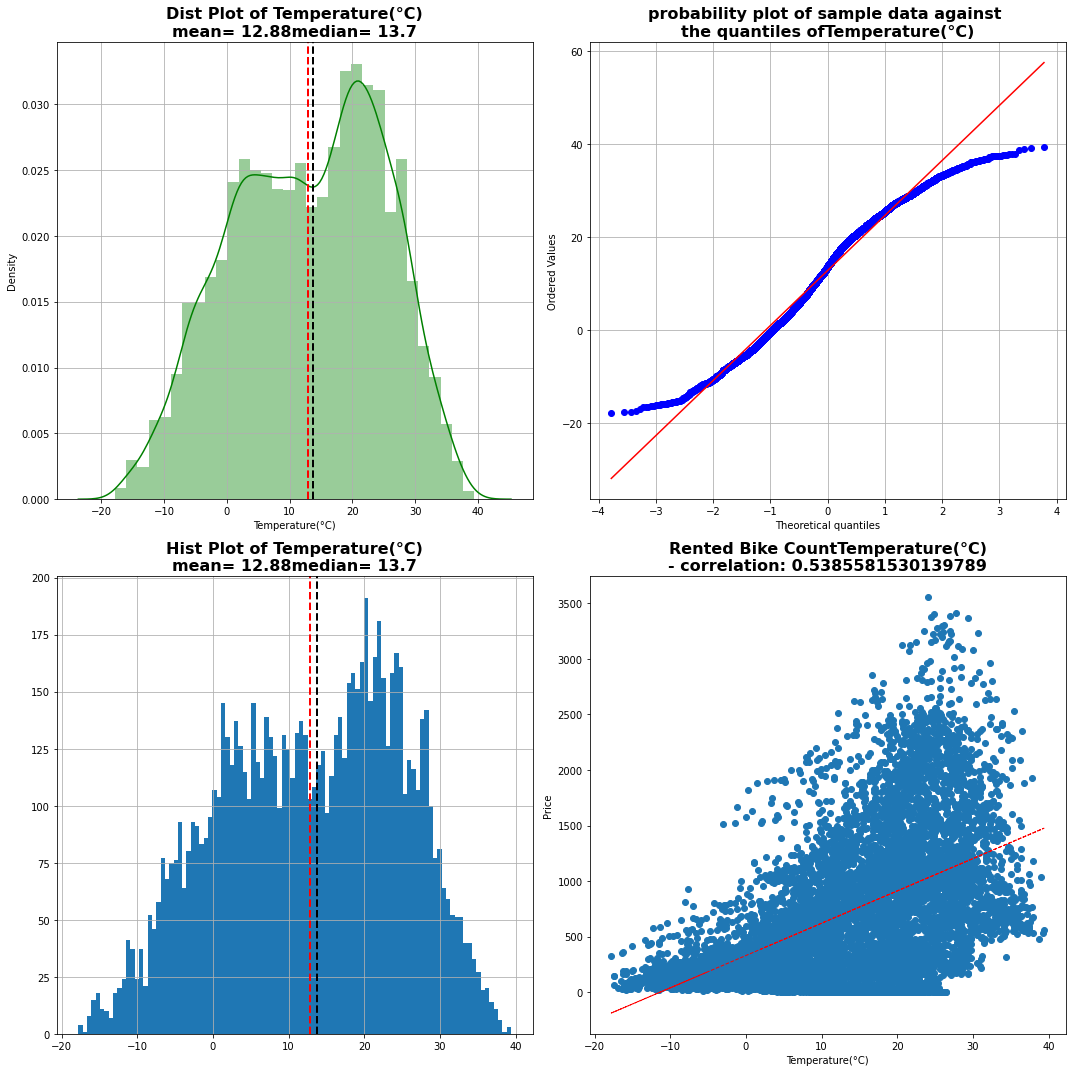



 Distribution and Bike Count Comparision Plot for Humidity(%)
------------------------------------------------------------------------------------------------------------------------------------------------------


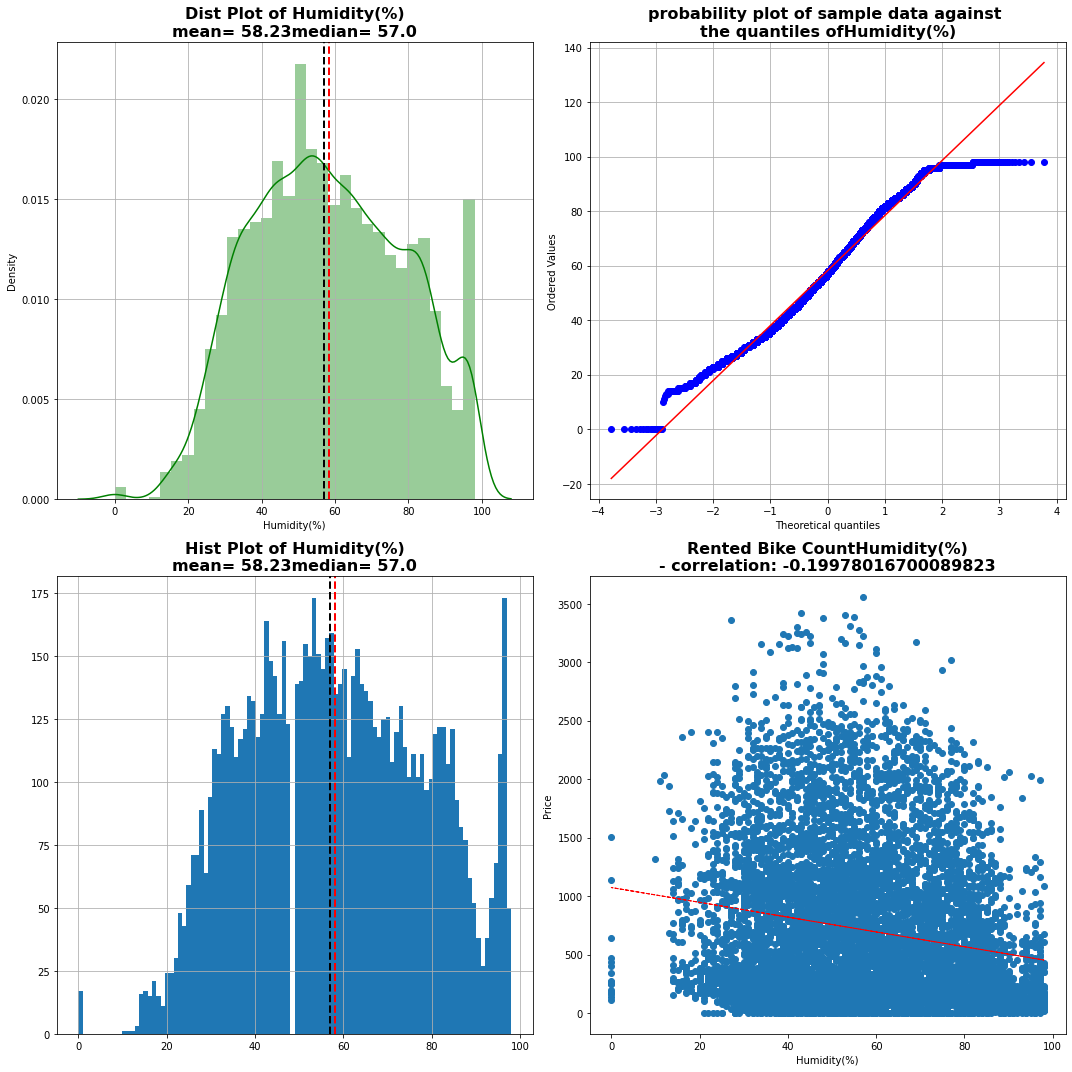



 Distribution and Bike Count Comparision Plot for Wind speed (m/s)
------------------------------------------------------------------------------------------------------------------------------------------------------


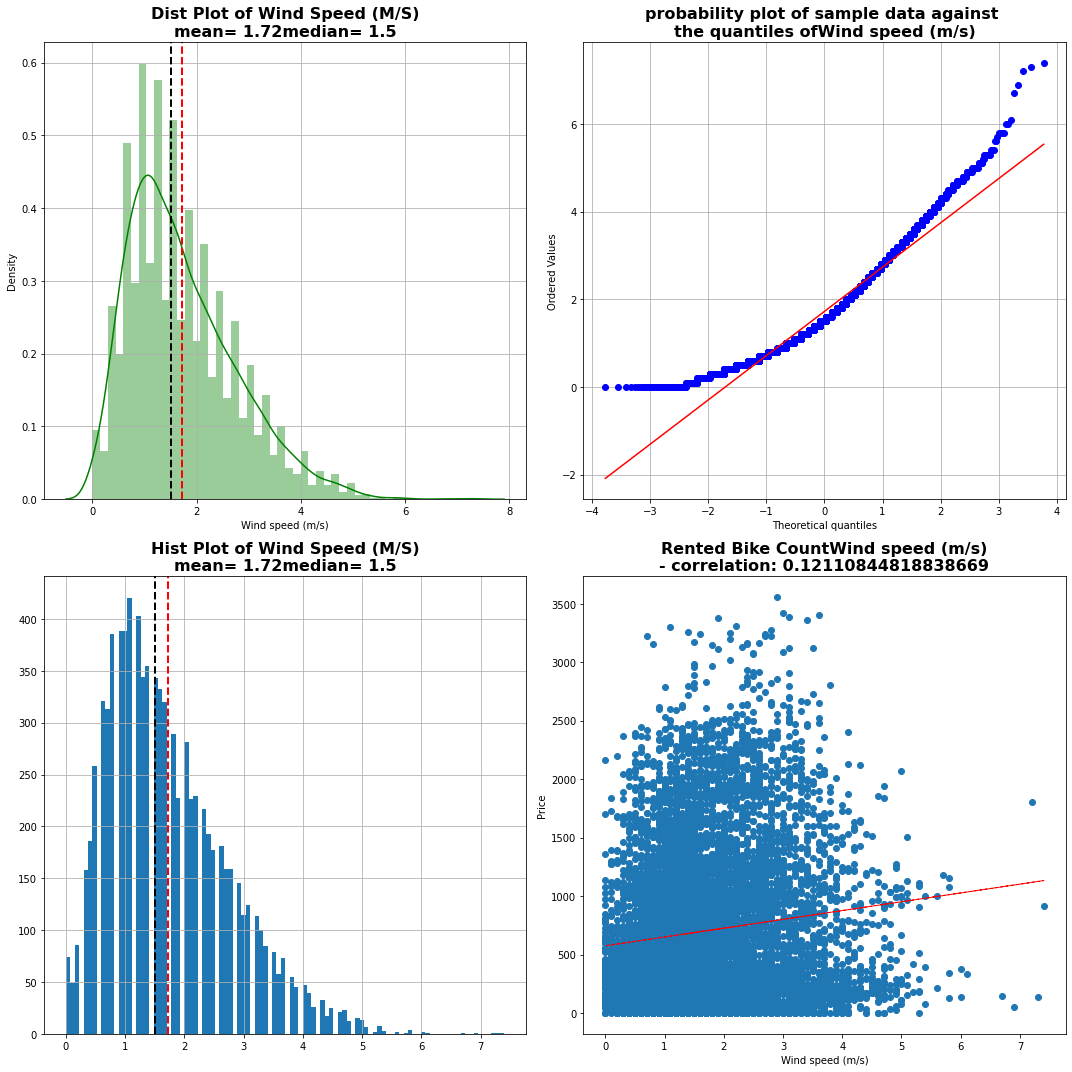



 Distribution and Bike Count Comparision Plot for Visibility (10m)
------------------------------------------------------------------------------------------------------------------------------------------------------


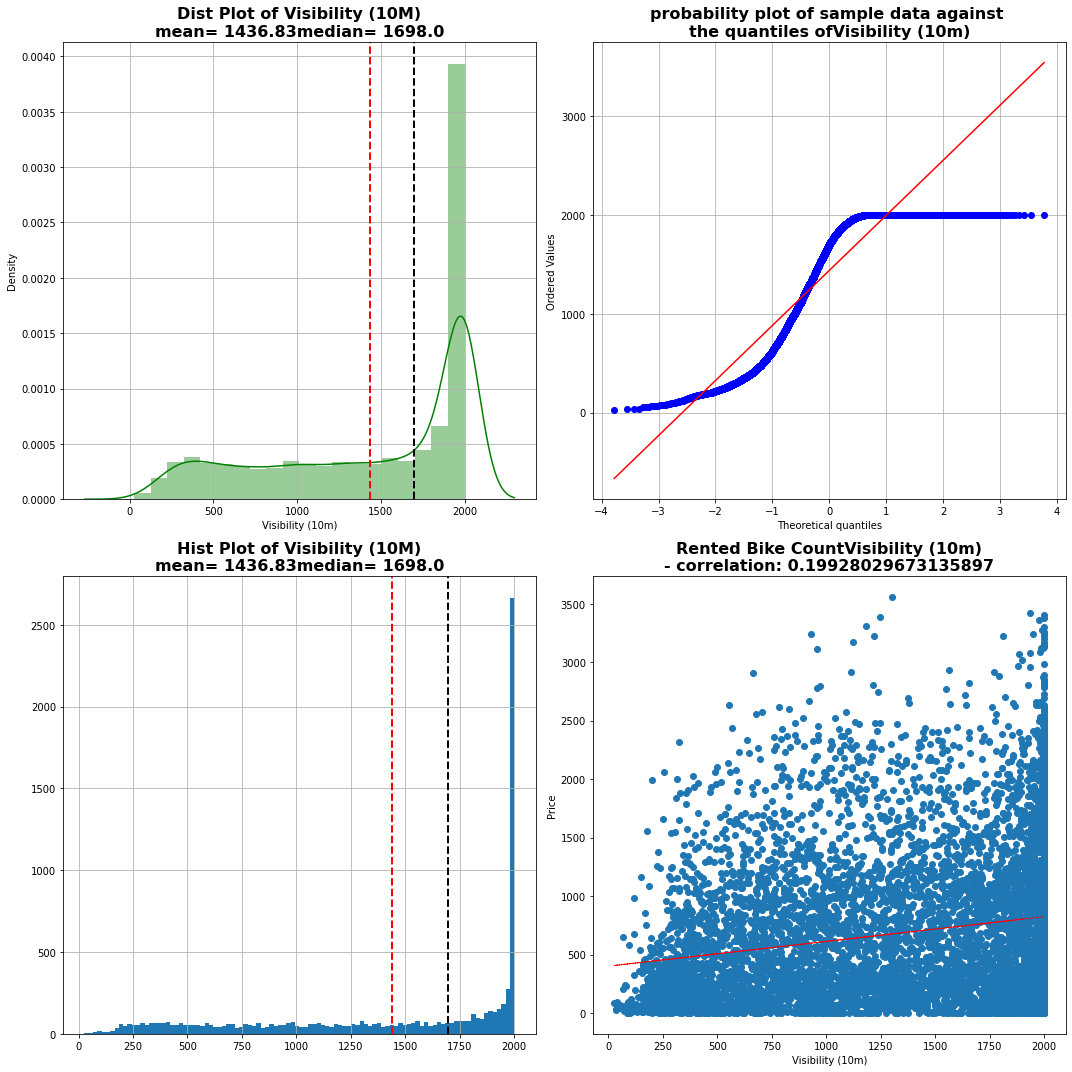



 Distribution and Bike Count Comparision Plot for Dew point temperature(°C)
------------------------------------------------------------------------------------------------------------------------------------------------------


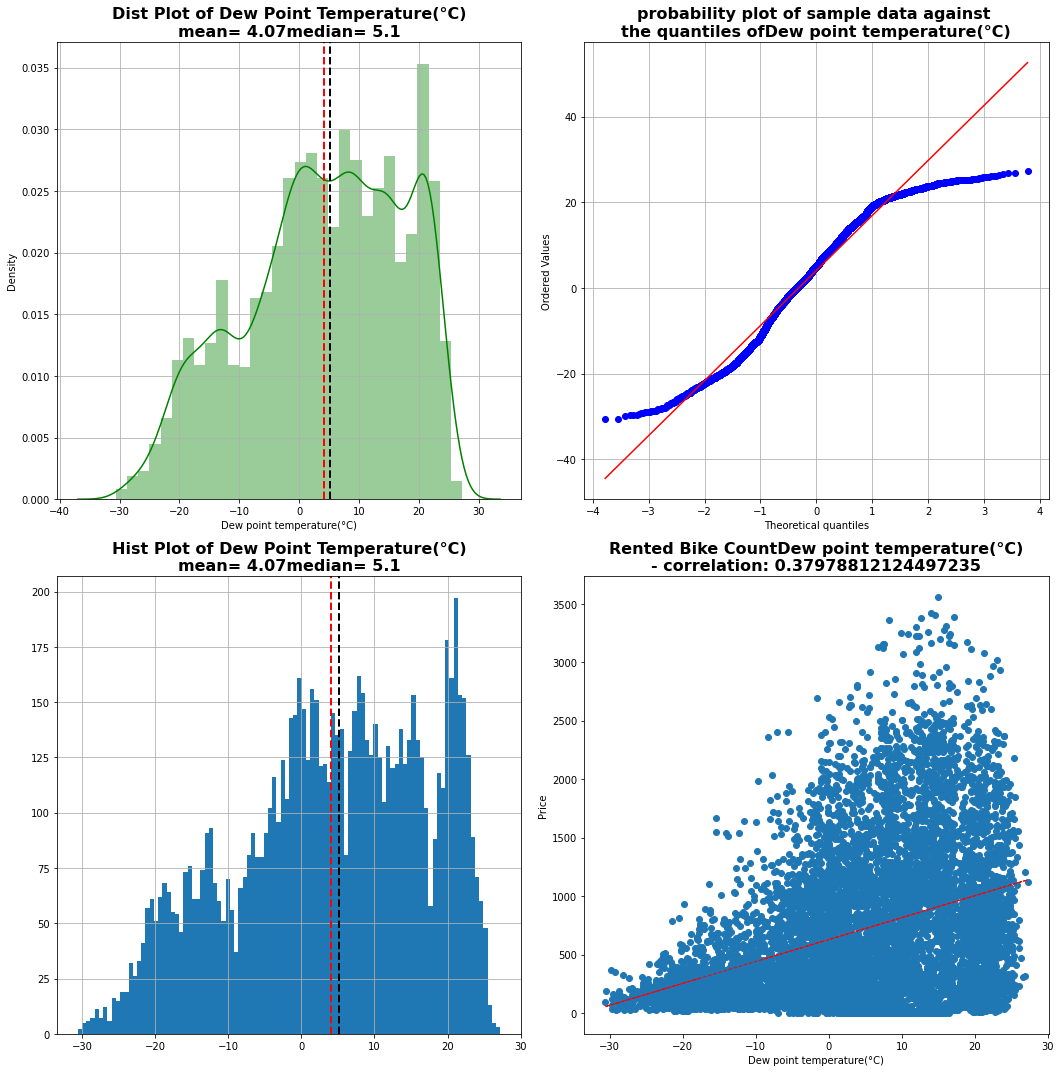



 Distribution and Bike Count Comparision Plot for Solar Radiation (MJ/m2)
------------------------------------------------------------------------------------------------------------------------------------------------------


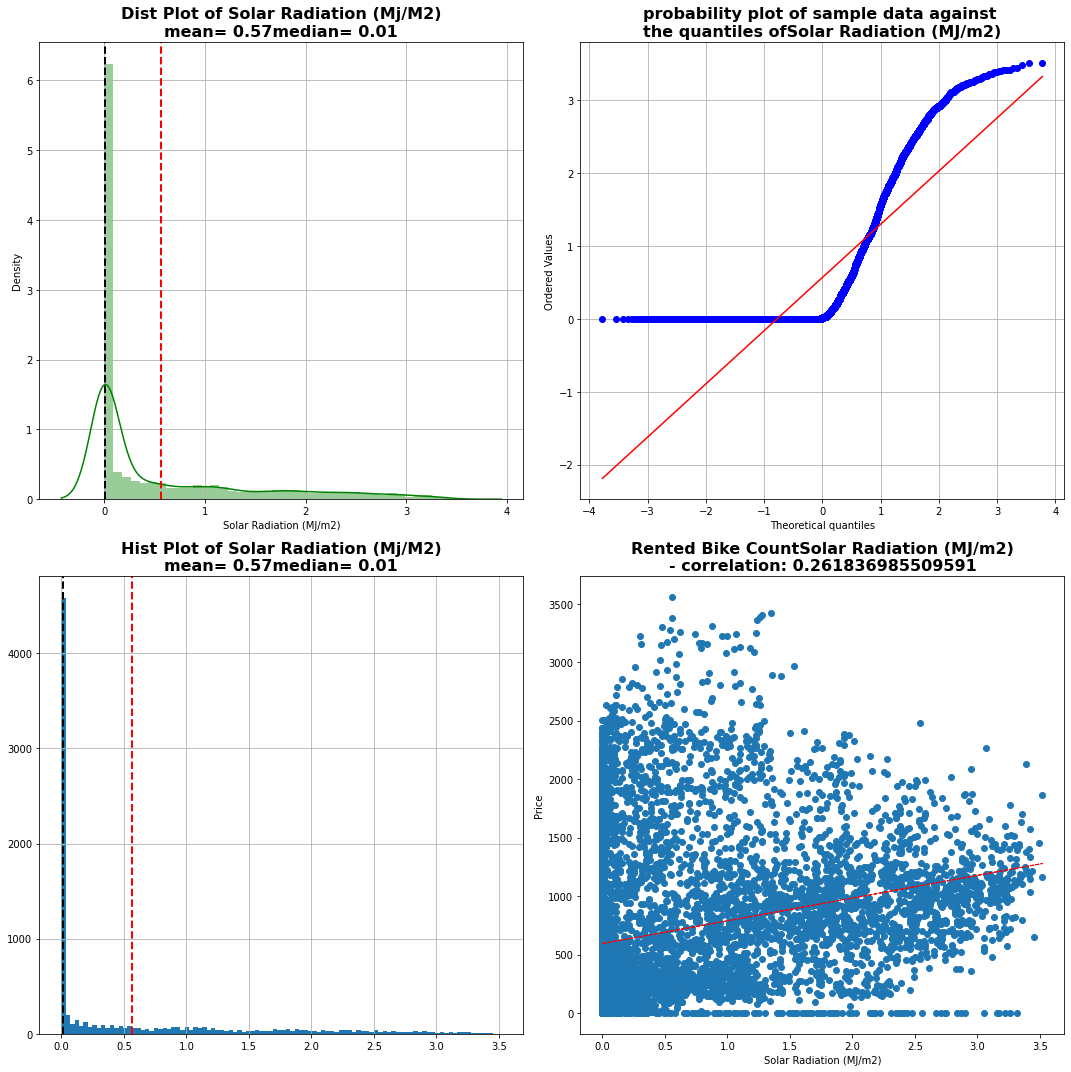



 Distribution and Bike Count Comparision Plot for Rainfall(mm)
------------------------------------------------------------------------------------------------------------------------------------------------------


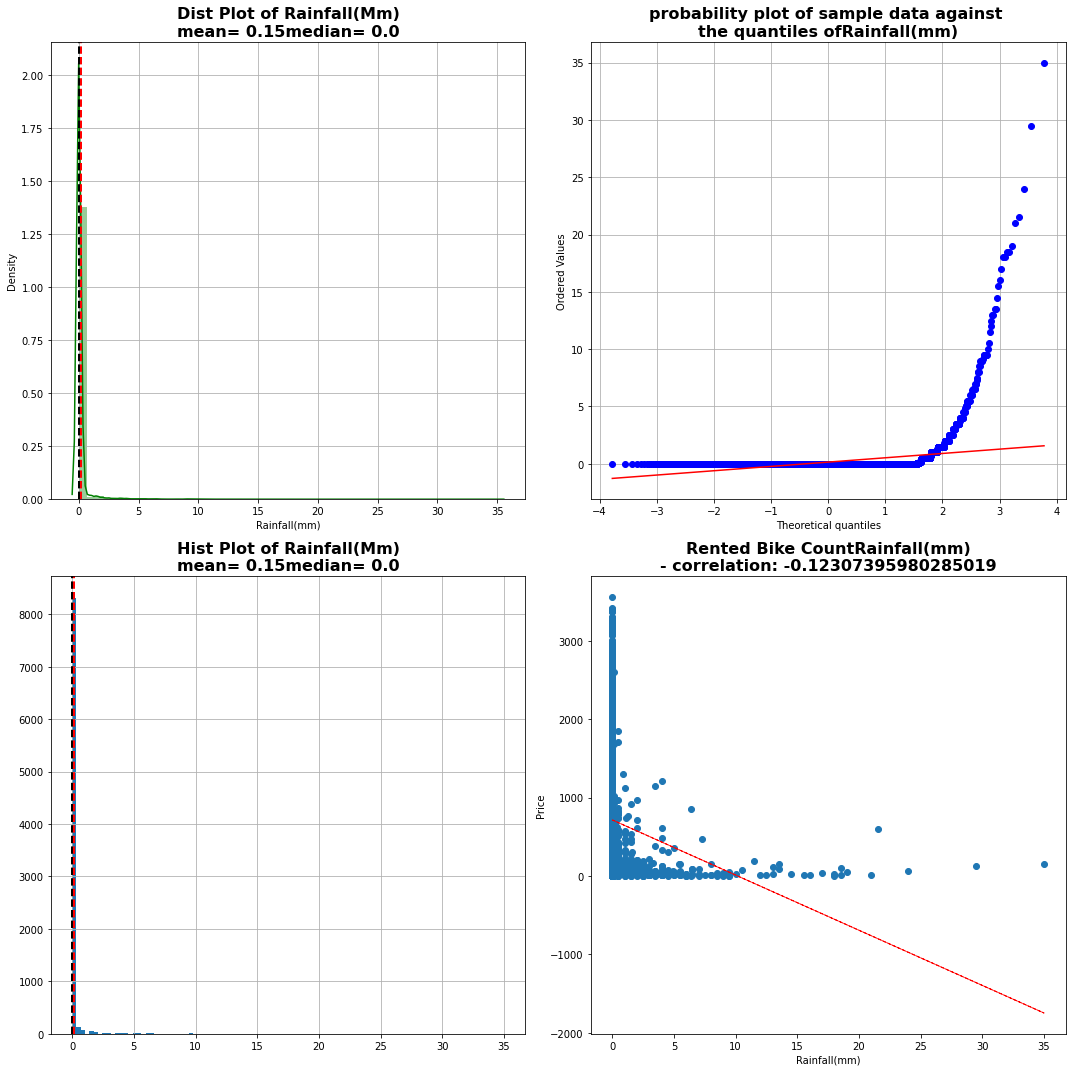



 Distribution and Bike Count Comparision Plot for Snowfall (cm)
------------------------------------------------------------------------------------------------------------------------------------------------------


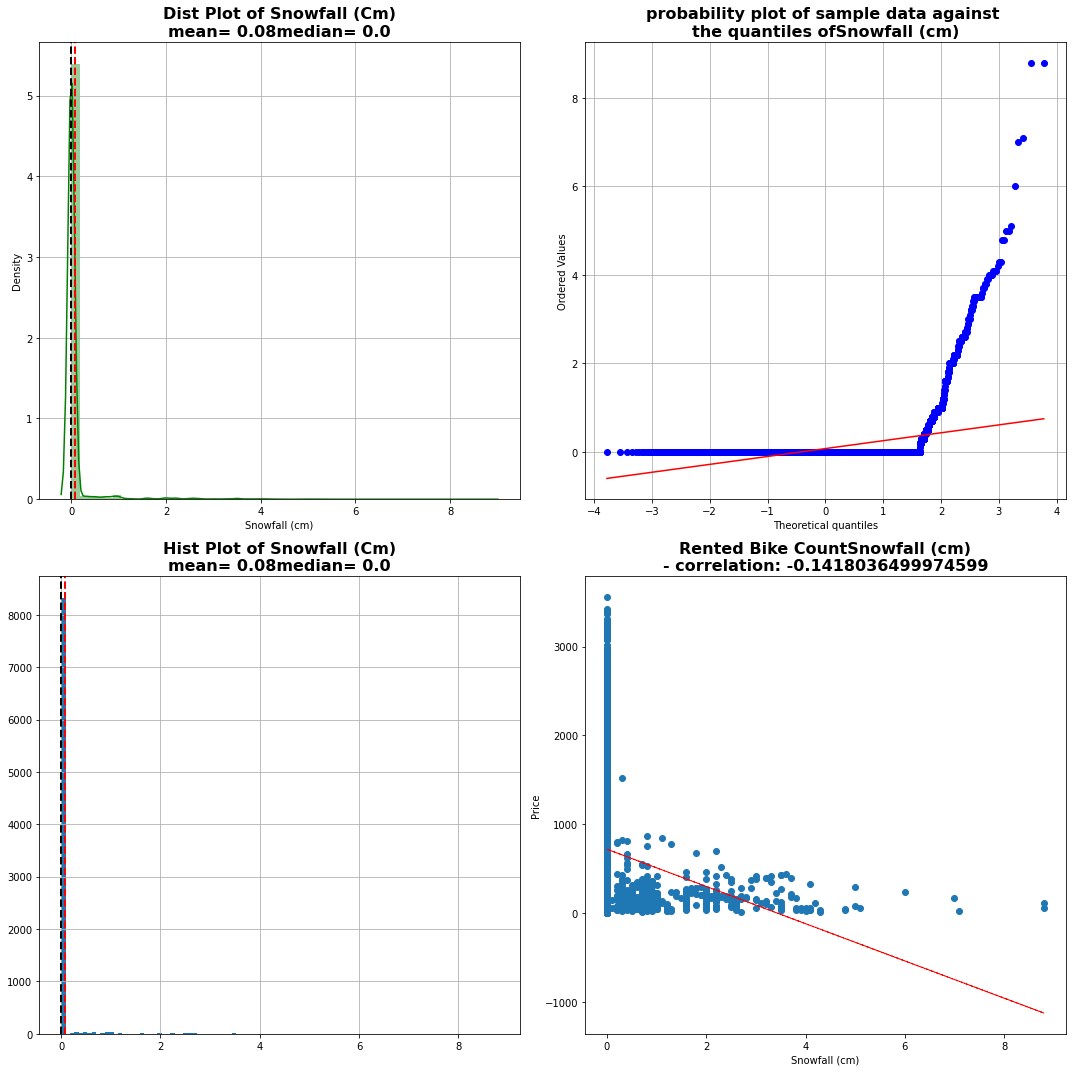



 Distribution and Bike Count Comparision Plot for day
------------------------------------------------------------------------------------------------------------------------------------------------------


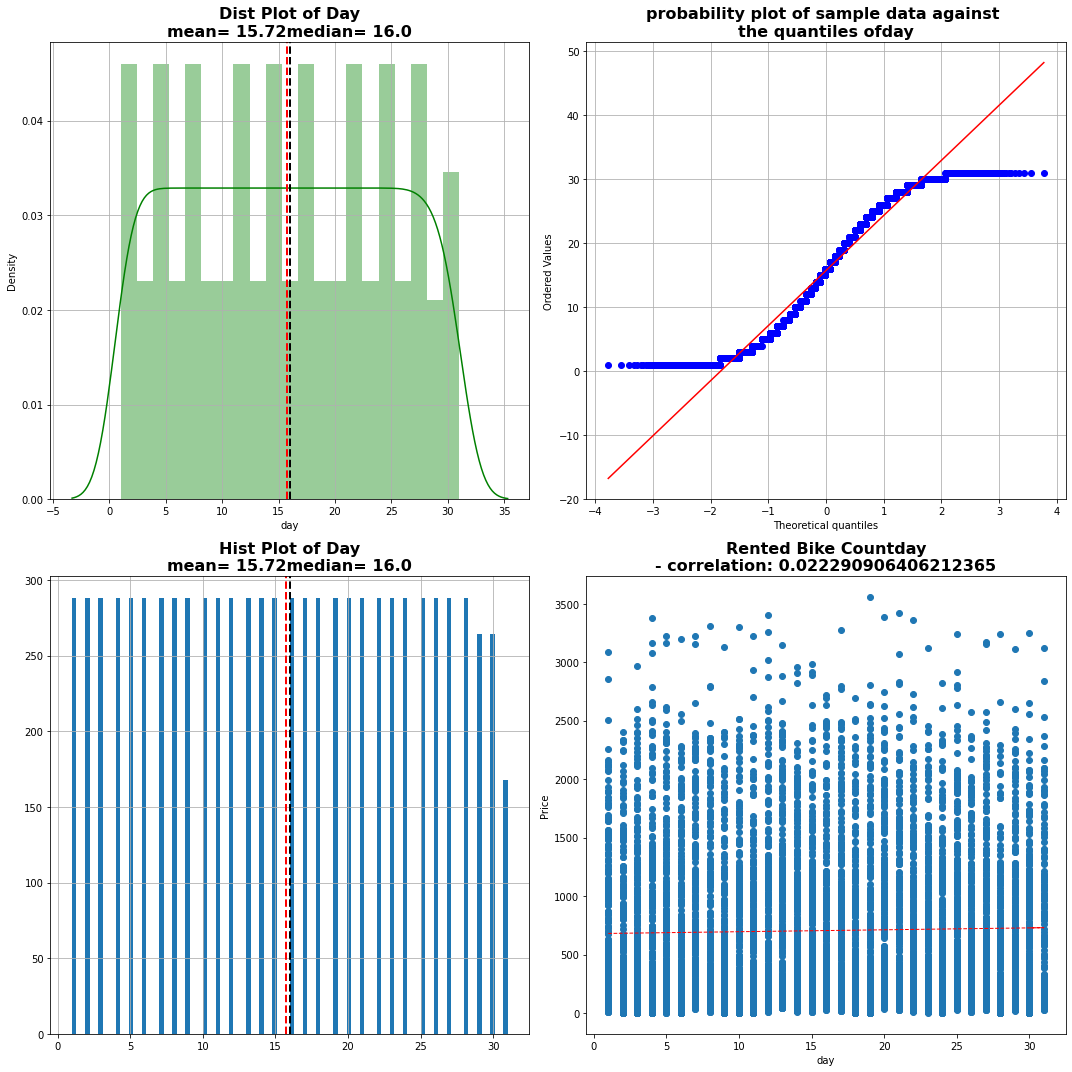



 Distribution and Bike Count Comparision Plot for month
------------------------------------------------------------------------------------------------------------------------------------------------------


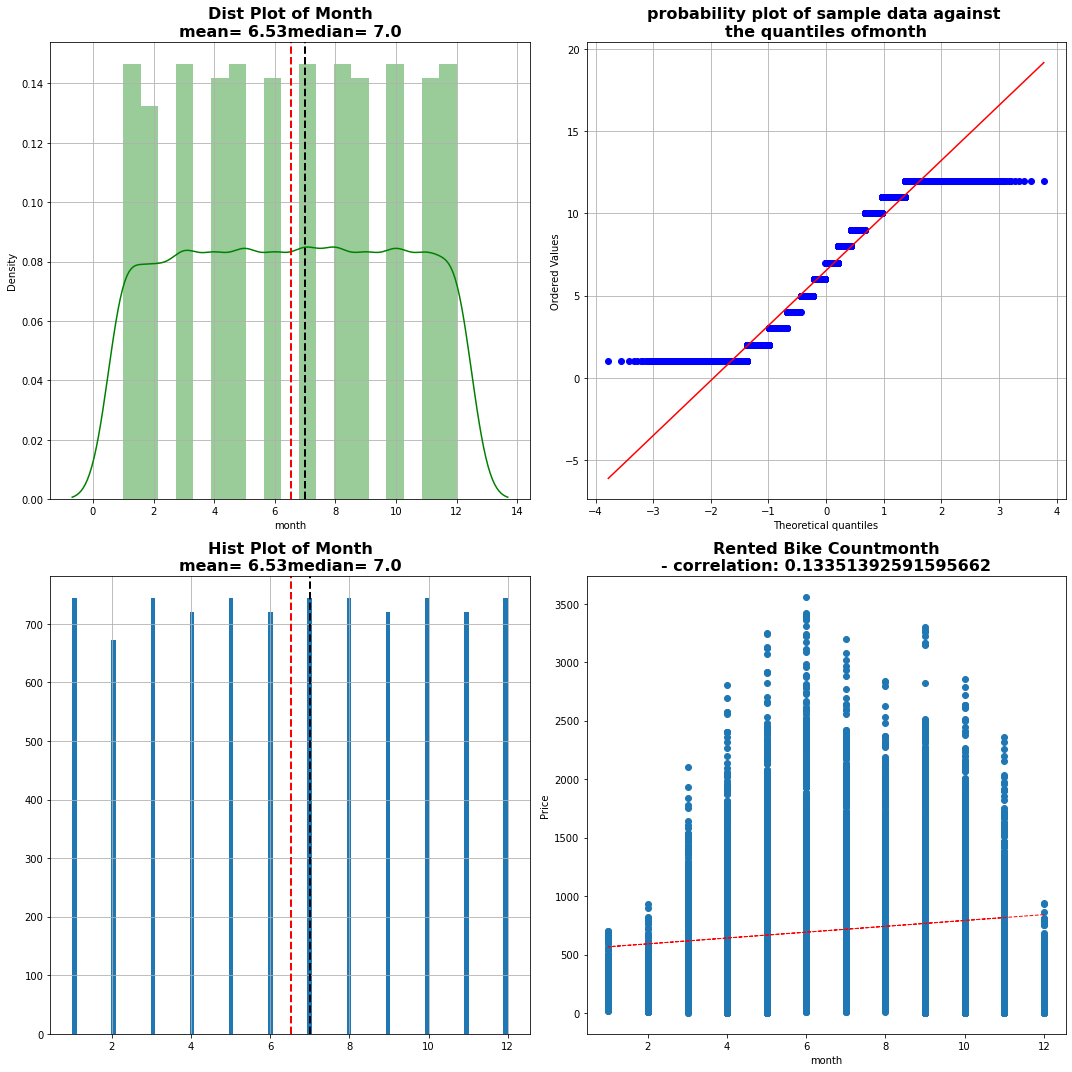



 Distribution and Bike Count Comparision Plot for year
------------------------------------------------------------------------------------------------------------------------------------------------------


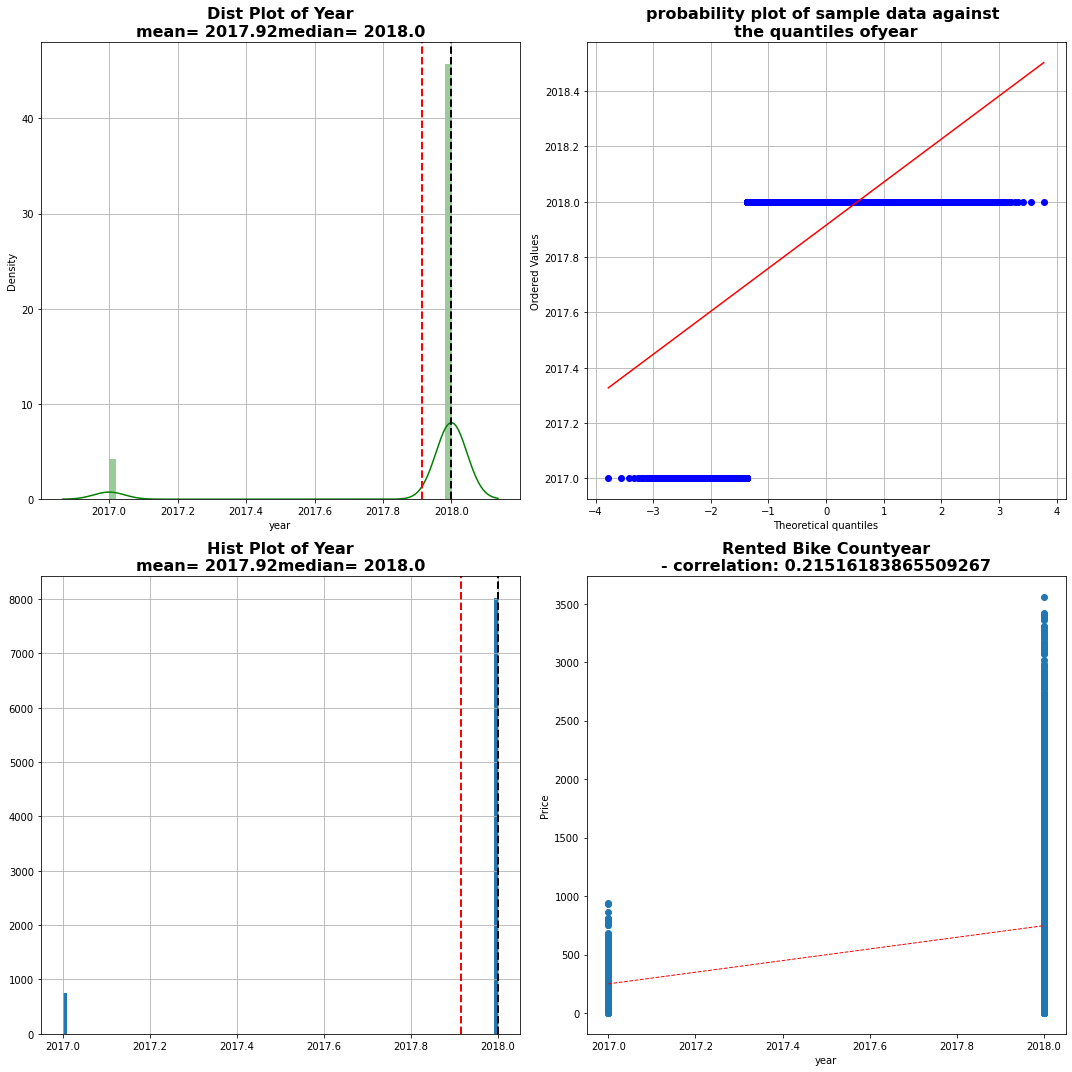

In [18]:
for col in Numeric_Features:
  print('\n')
  print('='*150,'\n',f'Distribution and Bike Count Comparision Plot for {col}')
  print('-'*150)

  
  plt.figure(figsize=(15,15))
  plt.title(f'Distribution and Bike Count Comparision Plot for feature column {col}',
            fontsize=20, fontweight='bold',color='m')

  #1# /-----------------------------------------------
  plt.subplot(2, 2, 1)   # Define 2 rows, 2 column, Activate subplot 1. 
  # Dependent Varible ''Rented Bike Count'
  plt.grid('on')
  sns.distplot(df[col],color="g")
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Dist Plot of '+col.title()+'\n'+'mean= '+str(round(df[col].mean(),2))+'median= '+str(round(df[col].median(),2)), 
            fontsize=16, fontweight='bold')


  #2# /-----------------------------------------------
  plt.subplot(2, 2, 2)   # 2 rows, 2 column, Activate subplot 2.
  # plot some data here
  plt.grid('on')
  stats.probplot(df[col], dist='norm', fit=True, plot=plt)
  plt.title(f"probability plot of sample data against \nthe quantiles of{col}",fontsize=16, fontweight='bold')




  #3# /-----------------------------------------------
  plt.subplot(2, 2, 3)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = df[col]
  feature.hist(bins=100) 
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Hist Plot of '+col.title()+'\n'+'mean= '+str(round(df[col].mean(),2))+'median= '+str(round(df[col].median(),2)),   
            fontsize=16, fontweight='bold')
  
  

  #4# /-----------------------------------------------
  plt.subplot(2, 2, 4)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = df[col]
  label = df['Rented Bike Count']

  # To check Correlation of data with price
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title('Rented Bike Count' + col + '\n- correlation: ' + str(correlation), fontsize=16, fontweight='bold')

  # Imply polyfit on feature
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)

  # to Prevent subplots overlap
  plt.tight_layout()  
  plt.show()




 Distribution and Bike Count Comparision Plot for Rented Bike Count
------------------------------------------------------------------------------------------------------------------------------------------------------


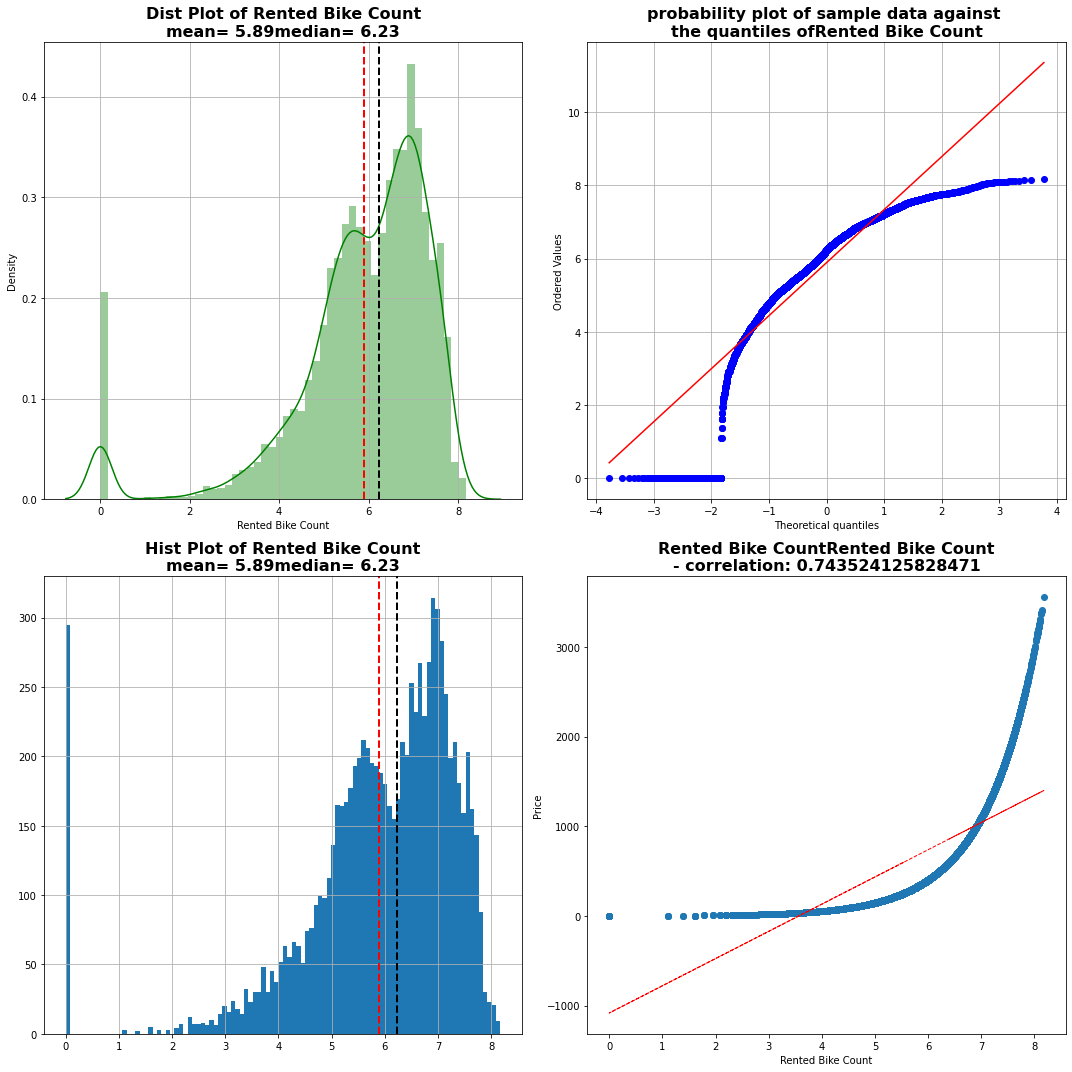

In [19]:
for col in Numeric_Features[:1]:
  print('\n')
  print('='*150,'\n',f'Distribution and Bike Count Comparision Plot for {col}')
  print('-'*150)


  
  plt.figure(figsize=(15,15))
  plt.title(f'Distribution and Bike Count Comparision Plot for feature column {col}',
            fontsize=20, fontweight='bold',color='m')

  #1# /-----------------------------------------------
  plt.subplot(2, 2, 1)   # Define 2 rows, 2 column, Activate subplot 1. 
  # Dependent Varible ''Rented Bike Count'
  plt.grid('on')
  sns.distplot(np.log1p(df[col]),color="g")
  plt.axvline(np.log1p(df[col]).mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(np.log1p(df[col]).median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Dist Plot of '+col.title()+'\n'+'mean= '+
            str(round(np.log1p(df[col]).mean(),2))+'median= '+
            str(round(np.log1p(df[col]).median(),2)), 
            fontsize=16, fontweight='bold')


  #2# /-----------------------------------------------
  plt.subplot(2, 2, 2)   # 2 rows, 2 column, Activate subplot 2.
  # plot some data here
  plt.grid('on')
  stats.probplot(np.log1p(df[col]), dist='norm', fit=True, plot=plt)
  plt.title(f"probability plot of sample data against \nthe quantiles of{col}",
            fontsize=16, fontweight='bold')




  #3# /-----------------------------------------------
  plt.subplot(2, 2, 3)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = np.log1p(df[col])
  feature.hist(bins=100) 
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='k', linestyle='dashed', linewidth=2)
  plt.title('Hist Plot of '+col.title()+'\n'+'mean= '+
            str(round(np.log1p(df[col]).mean(),2))+'median= '+
            str(round(np.log1p(df[col]).median(),2)),   
            fontsize=16, fontweight='bold')
  
  

  #4# /-----------------------------------------------
  plt.subplot(2, 2, 4)   # 2 rows, 2 column, Activate subplot 3.
  # plot some data here
  feature = np.log1p(df[col])
  label = df['Rented Bike Count']

  # To check Correlation of data with price
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title('Rented Bike Count' + col + '\n- correlation: ' + 
            str(correlation), fontsize=16, fontweight='bold')

  # Imply polyfit on feature
  z = np.polyfit(np.log1p(df[col]), df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(np.log1p(df[col]))
  plt.plot(np.log1p(df[col]), y_hat, "r--", lw=1)

  # to Prevent subplots overlap
  plt.tight_layout()  
  plt.show()


In [20]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'weekday'], dtype='object')



 Count and Box Plot for Seasons
------------------------------------------------------------------------------------------------------------------------------------------------------


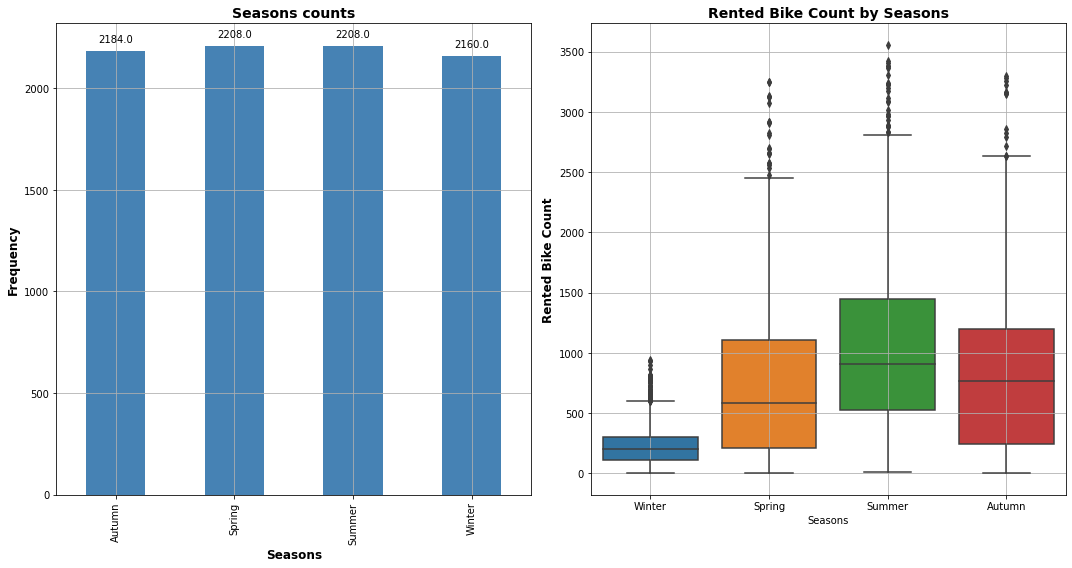



 Count and Box Plot for Holiday
------------------------------------------------------------------------------------------------------------------------------------------------------


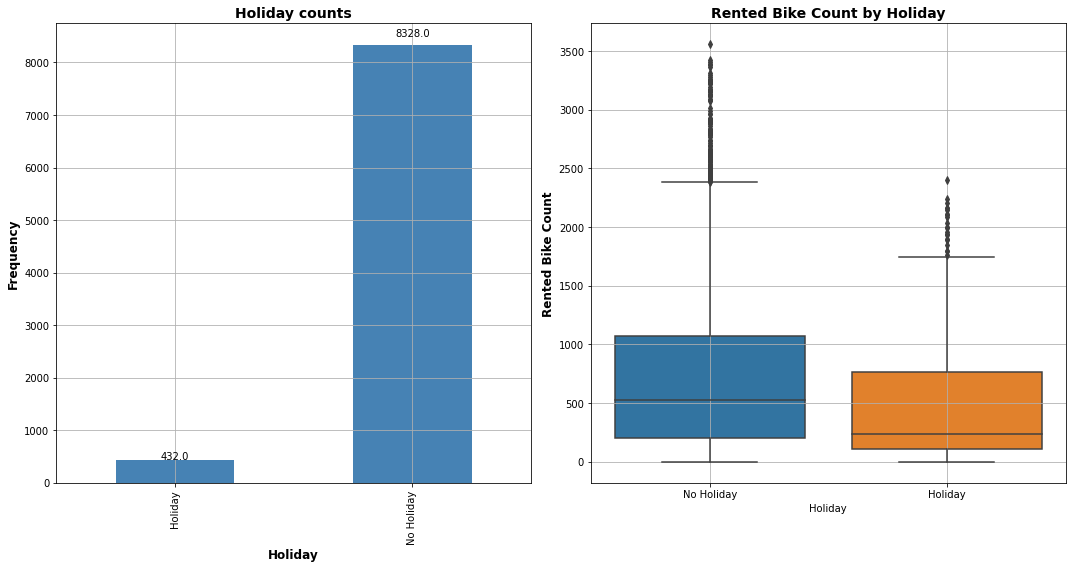



 Count and Box Plot for Functioning Day
------------------------------------------------------------------------------------------------------------------------------------------------------


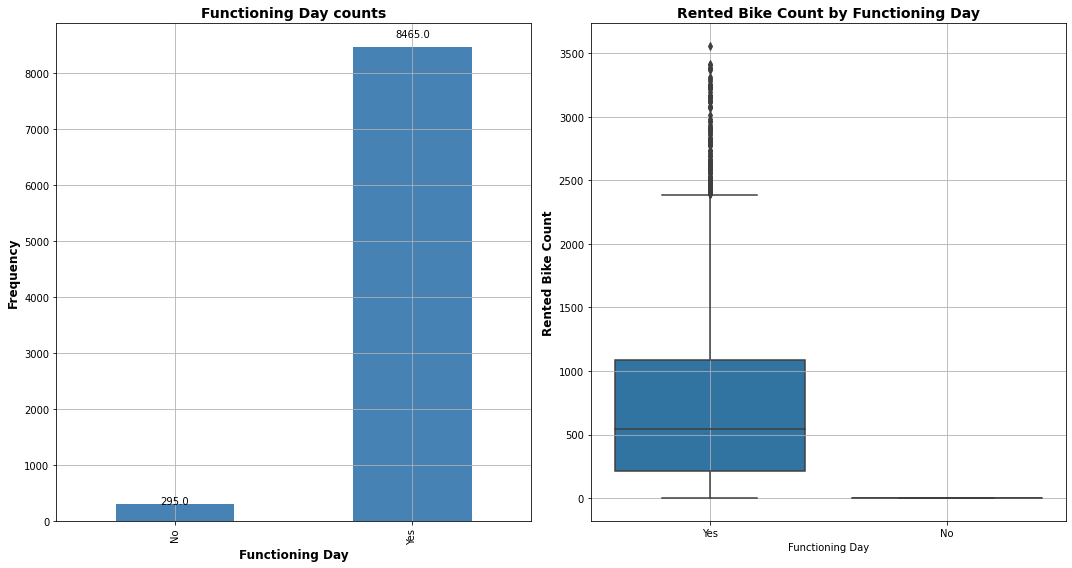



 Count and Box Plot for weekday
------------------------------------------------------------------------------------------------------------------------------------------------------


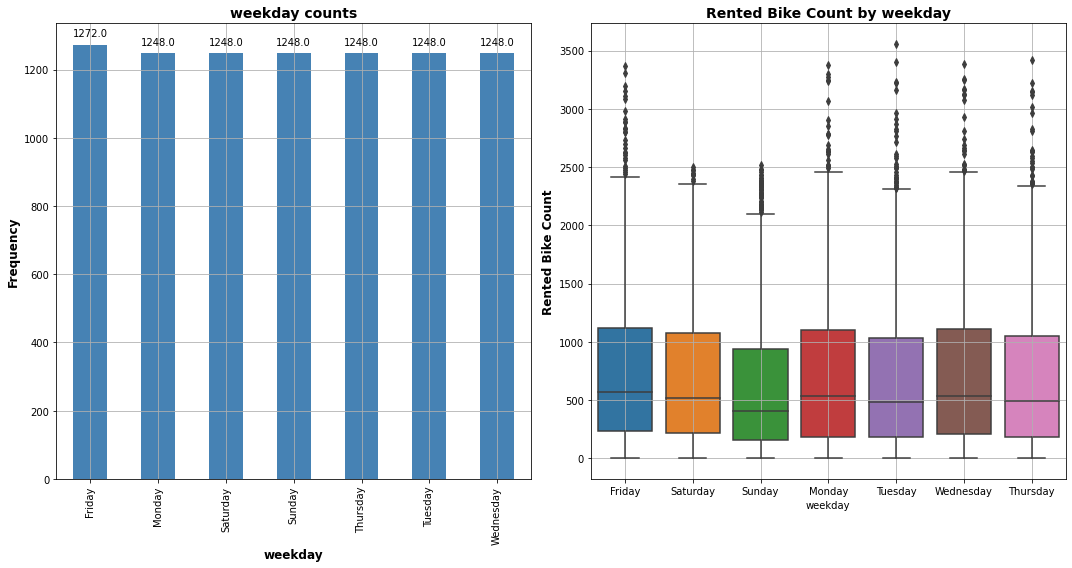

In [21]:
for col in categorical_features[0:]:

  print('\n')
  print('='*150,'\n',f'Count and Box Plot for {col}')
  print('-'*150)

  
  plt.figure(figsize=(15,8))
  plt.title(f'Count and Box Plot for {col}',
            fontsize=20, fontweight='bold',color='m')

  #1# /-----------------------------------------------
  plt.subplot(1, 2, 1)   # Define 2 rows, 2 column, Activate subplot 1. 
  # Dependent Varible ''Rented Bike Count'
  counts = df[col].value_counts().sort_index()
  couns_list = pd.DataFrame(counts).iloc[:,-1].values
  
  ax = counts.plot.bar(color='steelblue')
  plt.title(col + ' counts', fontsize=14, fontweight='bold')
  plt.xlabel(col,fontsize=12,fontweight='bold') 
  plt.ylabel("Frequency",fontsize=12,fontweight='bold')

  show_values(ax, orient="v", space=.02)
  plt.grid('on')

  #2# /-----------------------------------------------
  plt.subplot(1, 2, 2)   # 2 rows, 2 column, Activate subplot 2.
  # plot some data here
  sns.boxplot(data=df,y="Rented Bike Count",x=df[col],orient="v")
  plt.title('Rented Bike Count by ' + col, fontsize=14, fontweight='bold' )
  plt.ylabel("Rented Bike Count",fontsize=12,fontweight='bold')

  plt.grid('on')


  # to Prevent subplots overlap
  plt.tight_layout()  
  plt.show()



In [22]:
df["Date"] = data["Date"]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int64

In [24]:
# correlation = feature.corr(label)
#   plt.scatter(x=feature, y=label)

Text(0, 0.5, 'Rented Bike Count')

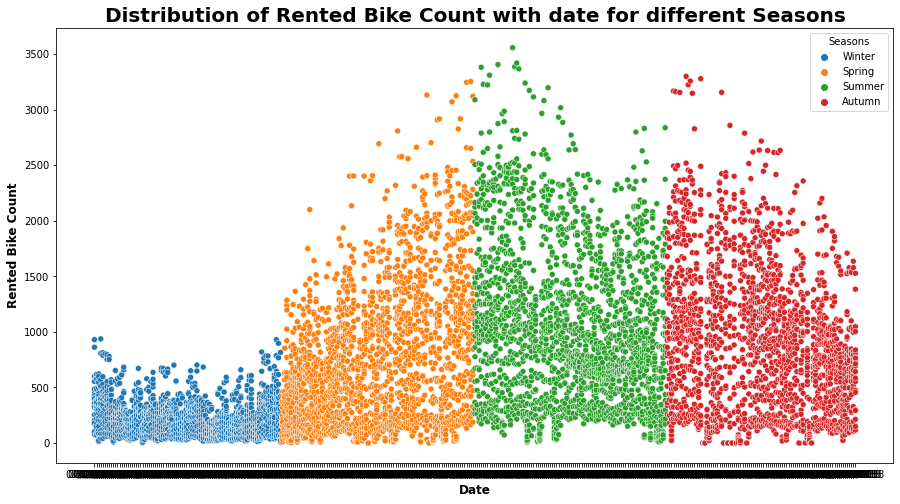

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Seasons")
plt.title("Distribution of Rented Bike Count with date for different Seasons", size=20, weight="bold")
plt.xlabel("Date", size=12, weight="bold")
plt.ylabel("Rented Bike Count", size=12, weight="bold")

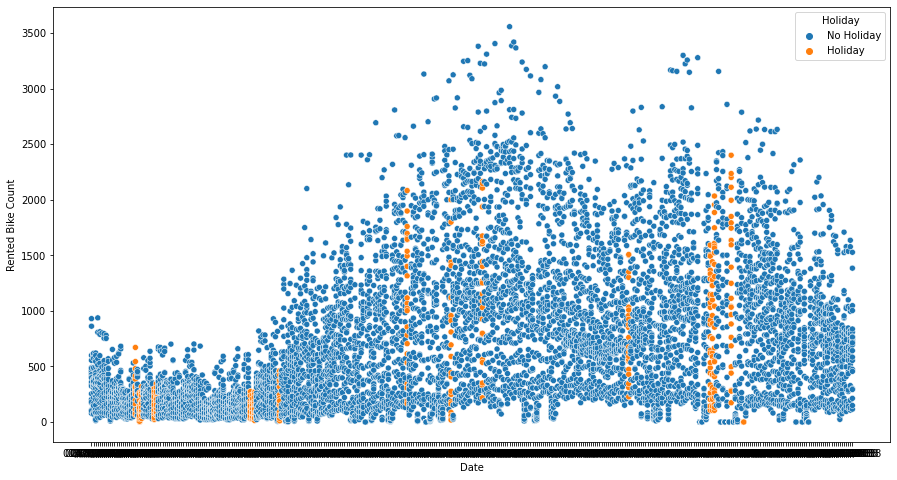

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Holiday")

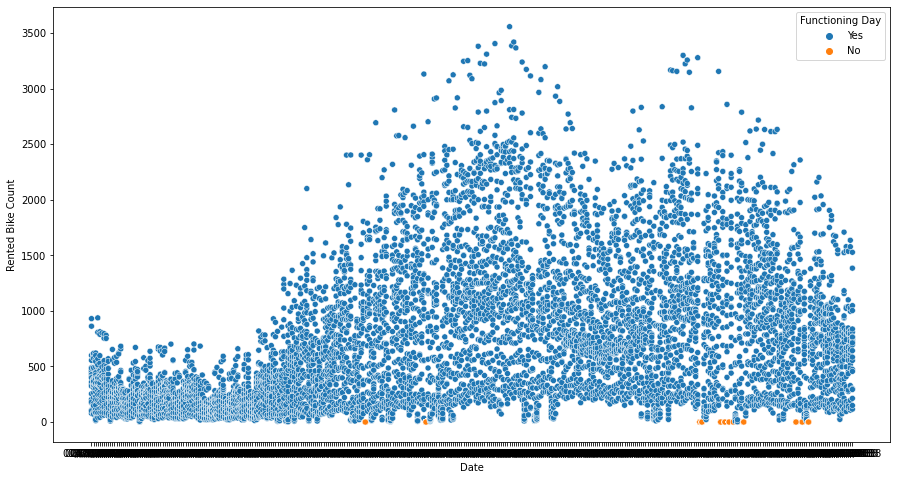

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Functioning Day")

In [28]:
df[df["Functioning Day"]=='No']['Rented Bike Count'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64

In [29]:
df['Month'] = df['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

In [30]:
df['Month -> Season'] = df['Month']+ '-> '+ df['Seasons']

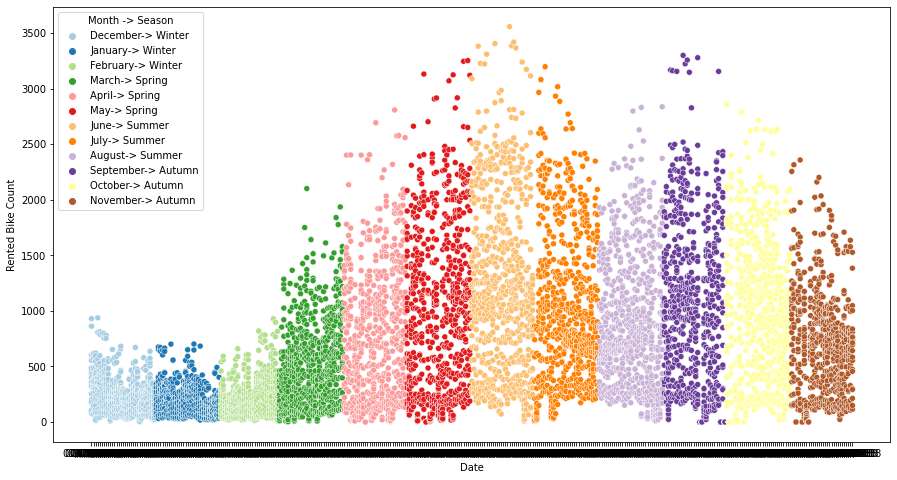

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Month -> Season", palette='Paired')

Average Count

In [32]:
df['Month -> Season'].unique()

array(['December-> Winter', 'January-> Winter', 'February-> Winter',
       'March-> Spring', 'April-> Spring', 'May-> Spring',
       'June-> Summer', 'July-> Summer', 'August-> Summer',
       'September-> Autumn', 'October-> Autumn', 'November-> Autumn'],
      dtype=object)

Text(0, 0.5, 'Average Bike Count')

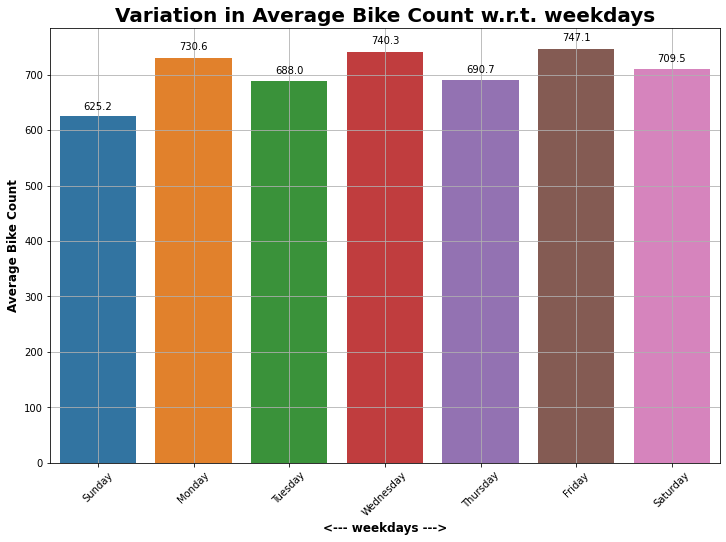

In [33]:
Average_Bike_Count_by_Month = df.groupby("weekday")['Rented Bike Count'].mean()
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('weekday')['Rented Bike Count'].mean().sort_values().index,
            y=df.groupby('weekday')['Rented Bike Count'].mean().sort_values().values,
            order=hueOrder)

show_values(ax, orient="v", space=.02)

plt.grid('on')
# Set X axis tics rotation
plt.xticks(rotation=45)

plt.title(f'Variation in Average Bike Count w.r.t. weekdays', size=20, weight='bold')
plt.xlabel("<--- weekdays --->", size=12, weight='bold')
plt.ylabel("Average Bike Count", size=12, weight='bold')

Text(0, 0.5, 'Average Bike Count')

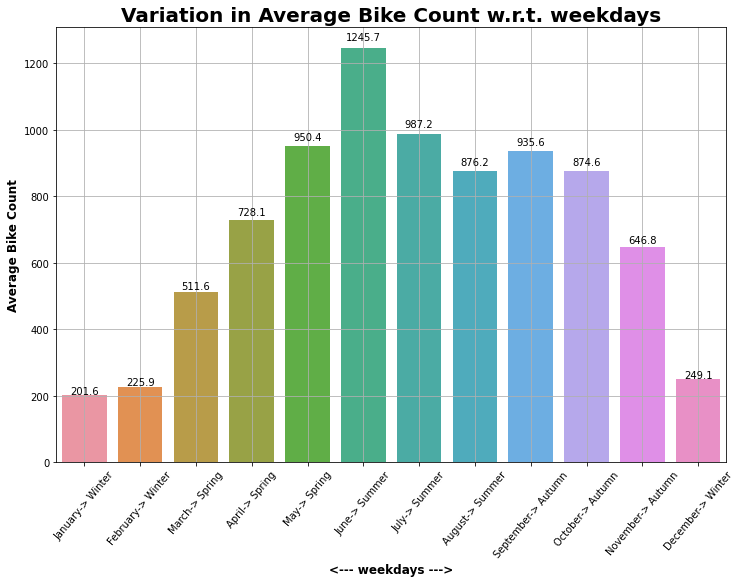

In [34]:
Average_Bike_Count_by_Month = df.groupby("Month")['Rented Bike Count'].mean()
sortOrder = ['January-> Winter', 'February-> Winter', 'March-> Spring', 
             'April-> Spring', 'May-> Spring','June-> Summer', 'July-> Summer', 
             'August-> Summer', 'September-> Autumn', 'October-> Autumn', 
             'November-> Autumn', 'December-> Winter']
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('Month -> Season')['Rented Bike Count'].mean().index,
            y=df.groupby('Month -> Season')['Rented Bike Count'].mean().values,
            order=sortOrder)

show_values(ax, orient="v", space=.02)

# Set X axis tics rotation
plt.xticks(rotation=50)

plt.grid('on')
plt.title(f'Variation in Average Bike Count w.r.t. weekdays', size=20, weight='bold')
plt.xlabel("<--- weekdays --->", size=12, weight='bold')
plt.ylabel("Average Bike Count", size=12, weight='bold')

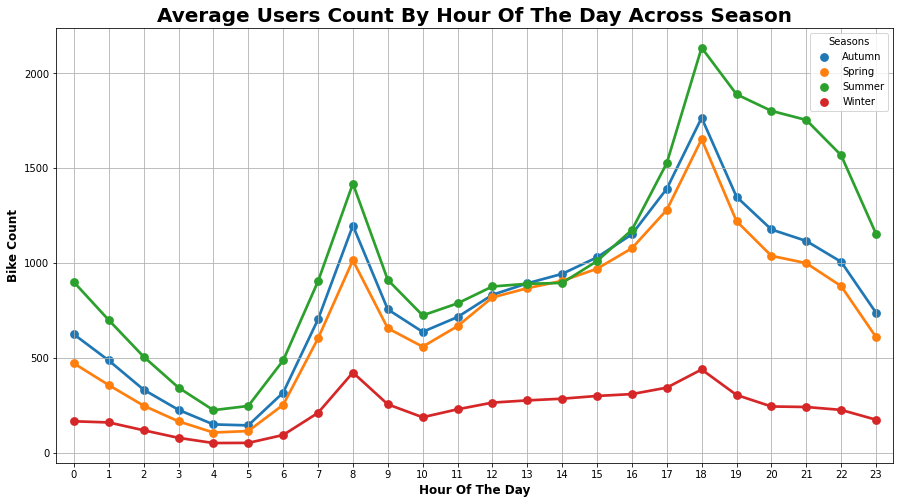

In [35]:
hourAggregated = pd.DataFrame(df.groupby(["Hour","Seasons"],sort=True)["Rented Bike Count"].mean()).reset_index()

plt.figure(figsize=(15,8))

sns.pointplot(x=hourAggregated["Hour"], 
              y=hourAggregated["Rented Bike Count"],
              hue=hourAggregated["Seasons"], 
              data=hourAggregated)

plt.title("Average Users Count By Hour Of The Day Across Season", size=20, weight='bold')
plt.xlabel("Hour Of The Day", size=12, weight='bold')
plt.ylabel("Bike Count", size=12, weight='bold')

plt.grid('on')

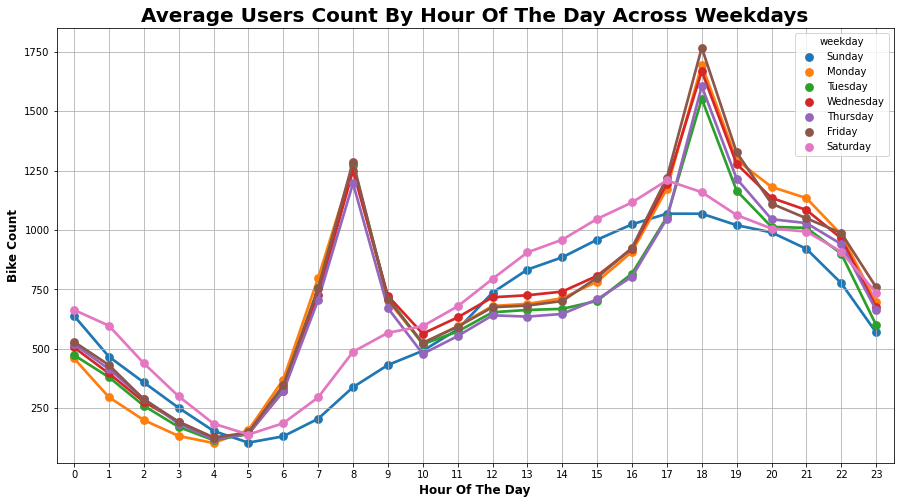

In [36]:

hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(df.groupby(["Hour","weekday"],sort=True)["Rented Bike Count"].mean()).reset_index()

plt.figure(figsize=(15,8))
sns.pointplot(x = hourAggregated["Hour"], 
              y = hourAggregated["Rented Bike Count"],
              hue = hourAggregated["weekday"],
              hue_order = hueOrder, 
              data = hourAggregated)

plt.title("Average Users Count By Hour Of The Day Across Weekdays", size=20, weight='bold')
plt.xlabel("Hour Of The Day", size=12, weight='bold')
plt.ylabel("Bike Count", size=12, weight='bold')

plt.grid('on')

In [37]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'weekday', 'Date',
       'Month', 'Month -> Season'],
      dtype='object')



Variation in Average Bike Count w.r.t. Temperature(°C) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


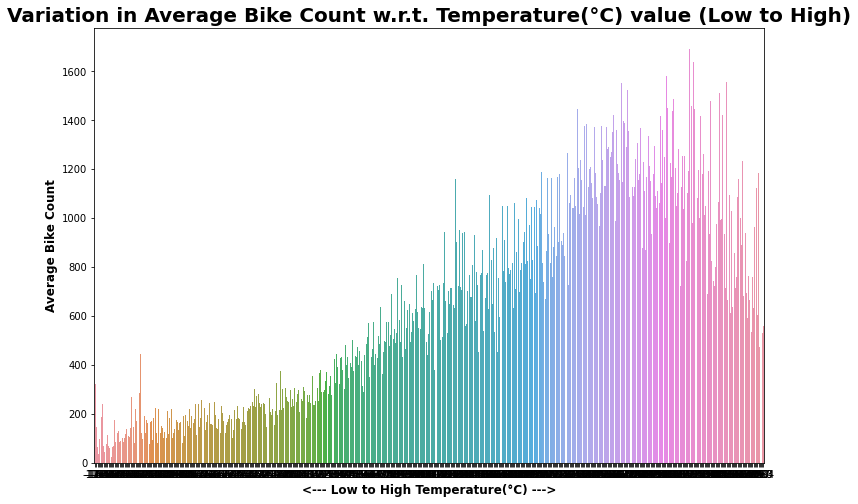



Variation in Average Bike Count w.r.t. Humidity(%) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


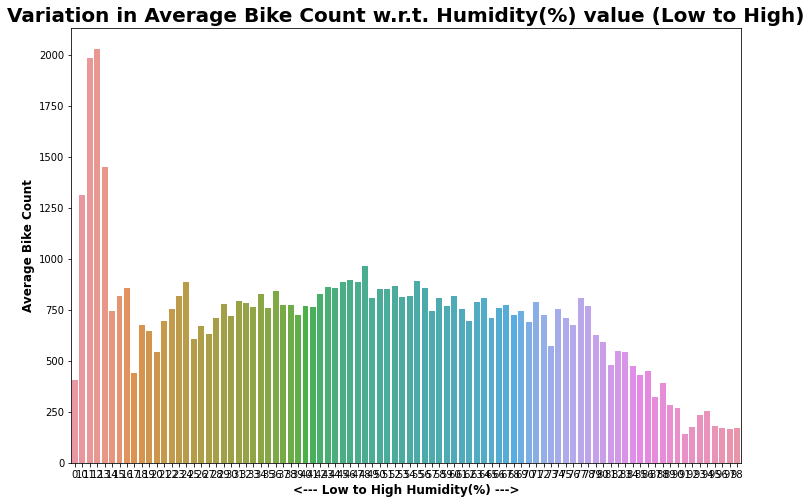



Variation in Average Bike Count w.r.t. Wind speed (m/s) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


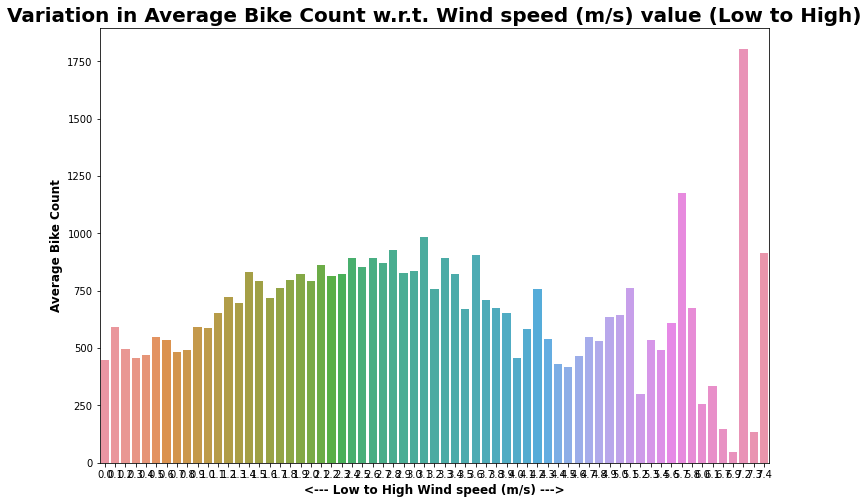



Variation in Average Bike Count w.r.t. Visibility (10m) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


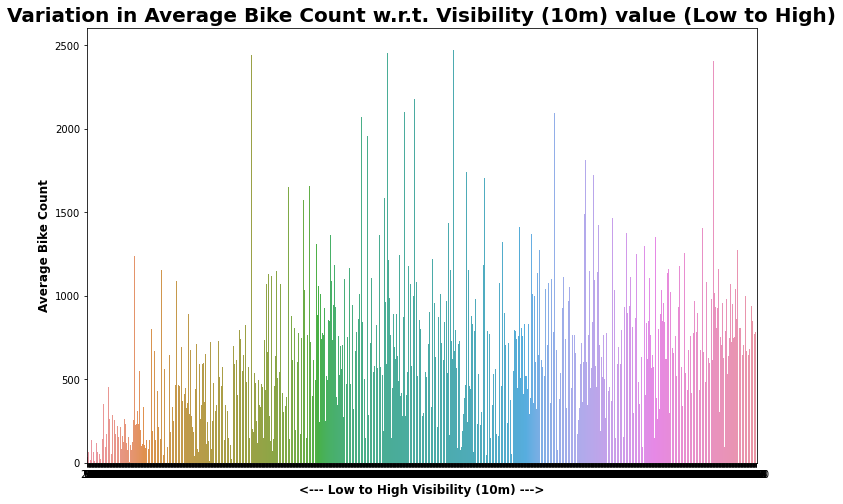



Variation in Average Bike Count w.r.t. Dew point temperature(°C) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


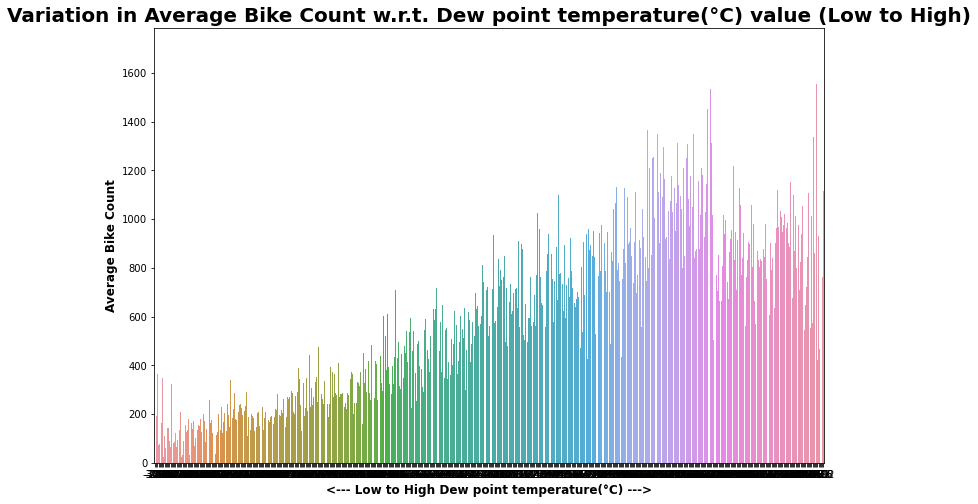



Variation in Average Bike Count w.r.t. Solar Radiation (MJ/m2) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


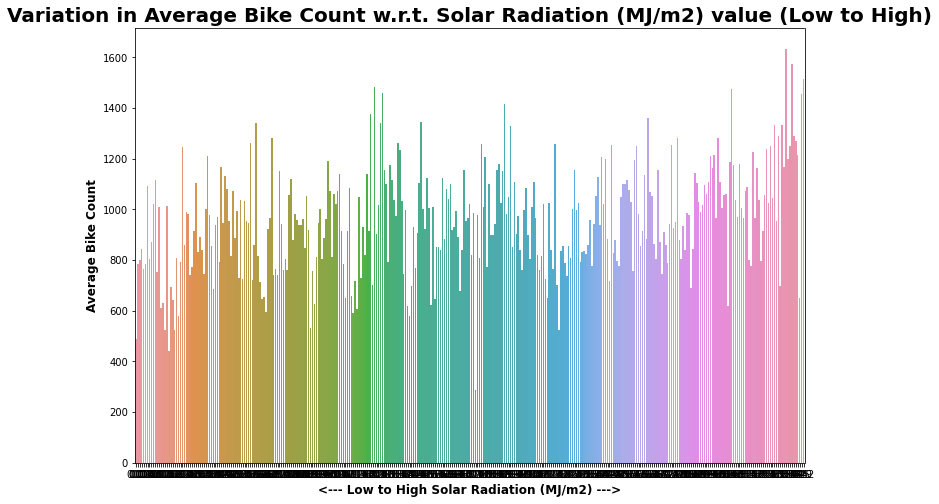



Variation in Average Bike Count w.r.t. Rainfall(mm) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


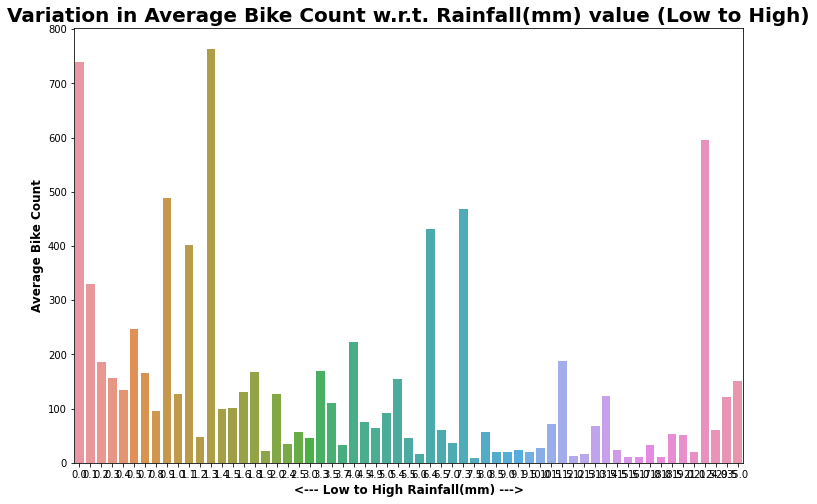



Variation in Average Bike Count w.r.t. Snowfall (cm) value (Low to High)
------------------------------------------------------------------------------------------------------------------------------------------------------


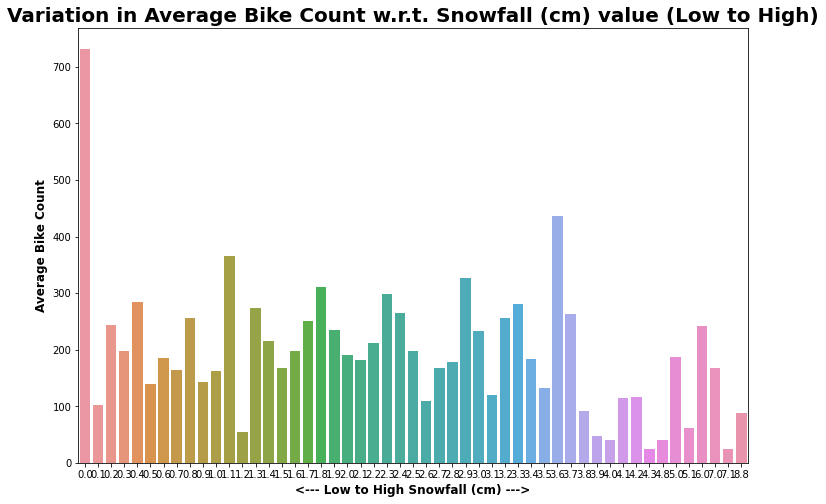

In [38]:
avg_count_by_list = ['Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 
                     'Visibility (10m)', 'Dew point temperature(°C)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in avg_count_by_list:
  print('\n')
  print('='*150)
  print(f'Variation in Average Bike Count w.r.t. {col} value (Low to High)')
  print('-'*150)
  plt.figure(figsize=(12,8))
  sns.barplot(x=df.groupby(col)['Rented Bike Count'].mean().sort_values().index,
              y=df.groupby(col)['Rented Bike Count'].mean().sort_values().values)
  plt.title(f'Variation in Average Bike Count w.r.t. {col} value (Low to High)', size=20, weight='bold')
  plt.xlabel(f"<--- Low to High {col} --->", size=12, weight='bold')
  plt.ylabel("Average Bike Count", size=12, weight='bold')
  plt.show()

In [39]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month                          12
year                            2
weekday                         7
Date                          365
Month                          12
Month -> Season                12
dtype: int64

In [40]:
object_list = ['Seasons', 'Holiday', 'Functioning Day','weekday']
for i in object_list:
  print('-'*50,f"\nUnique Values in '{i}' column:-\n",df[i].unique(),'\n\n')

-------------------------------------------------- 
Unique Values in 'Seasons' column:-
 ['Winter' 'Spring' 'Summer' 'Autumn'] 


-------------------------------------------------- 
Unique Values in 'Holiday' column:-
 ['No Holiday' 'Holiday'] 


-------------------------------------------------- 
Unique Values in 'Functioning Day' column:-
 ['Yes' 'No'] 


-------------------------------------------------- 
Unique Values in 'weekday' column:-
 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday'] 




In [41]:
corr_df = df.copy()
le = LabelEncoder()
# Encode labels of multiple columns at once
corr_df[object_list] = corr_df[object_list].apply(le.fit_transform)
# Print head
corr_df.head()

Rented Bike Count  Hour  ...     Month    Month -> Season
0                254     0  ...  December  December-> Winter
1                204     1  ...  December  December-> Winter
2                173     2  ...  December  December-> Winter
3                107     3  ...  December  December-> Winter
4                 78     4  ...  December  December-> Winter

[5 rows x 20 columns]

In [42]:
corr_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'year', 'weekday', 'Date',
       'Month', 'Month -> Season'],
      dtype='object')

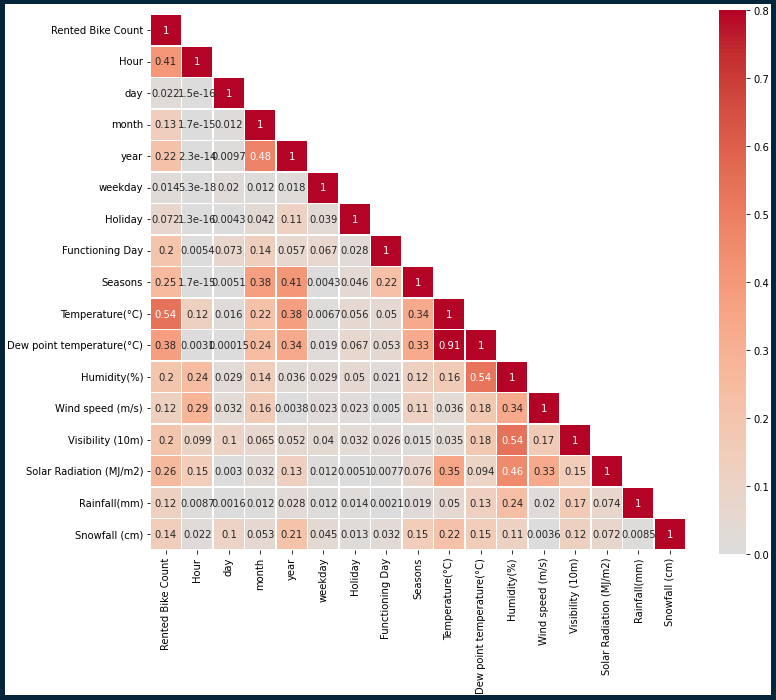

In [43]:
## Correlation
plt.figure(figsize=(12,10),linewidth=10,edgecolor="#04253a" )

corrMatt = corr_df[['Rented Bike Count', 'Hour', 'day', 'month', 'year', 'weekday', 
                    'Holiday', 'Functioning Day', 'Seasons', 'Temperature(°C)', 
                    'Dew point temperature(°C)','Humidity(%)', 'Wind speed (m/s)', 
                    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
                    'Snowfall (cm)']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(abs(corrMatt), annot=True, 
            cmap=(sns.color_palette("coolwarm", as_cmap=True)), 
            center=0, mask=mask,vmax=.8,
            square=True, linewidths=.5)
plt.show()

3 - multicollinearity with Variance Inflation factor

In [44]:
# Multicollinearity
# multicollinearity with Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  """ Calculating VIF"""
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
  return(vif)

In [45]:
calc_vif(corrMatt[[i for i in corrMatt.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','year','Humidity(%)']]])

variables       VIF
0                      Hour  1.703751
1                       day  1.100772
2                     month  1.617919
3                   weekday  1.057199
4                   Holiday  1.081836
5           Functioning Day  1.297805
6                   Seasons  2.669733
7           Temperature(°C)  3.354149
8          Wind speed (m/s)  2.782787
9          Visibility (10m)  1.791118
10  Solar Radiation (MJ/m2)  2.886191
11             Rainfall(mm)  1.252580
12            Snowfall (cm)  1.564310

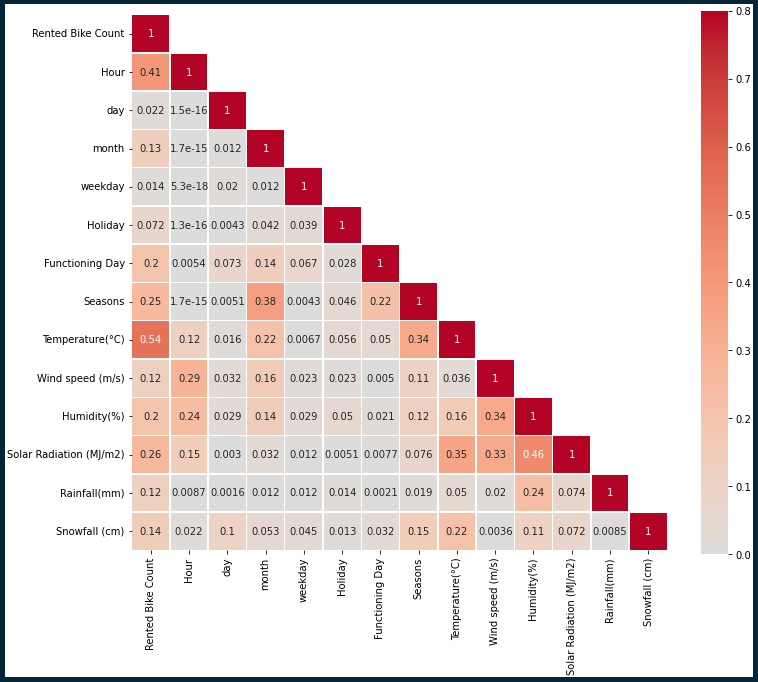

In [46]:
## Correlation
plt.figure(figsize=(12,10),linewidth=10,edgecolor="#04253a" )

corrMatt = corr_df[['Rented Bike Count', 'Hour', 'day', 'month', 'weekday', 
                    'Holiday', 'Functioning Day', 'Seasons', 'Temperature(°C)',
                    'Wind speed (m/s)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 
                    'Rainfall(mm)', 'Snowfall (cm)']].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(abs(corrMatt), annot=True, 
            cmap=(sns.color_palette("coolwarm", as_cmap=True)), 
            center=0, mask=mask,vmax=.8,
            square=True, linewidths=.5)
plt.show()

In [47]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                            31
month                          12
year                            2
weekday                         7
Date                          365
Month                          12
Month -> Season                12
dtype: int64

In [48]:
final_df = df[['Hour', 'day', 'month', 'weekday', 'Holiday', 'Functioning Day', 
               'Seasons', 'Temperature(°C)', 'Wind speed (m/s)', 'Humidity(%)', 
               'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
               'Rented Bike Count']]
final_df.head()

Hour  day  month  ... Rainfall(mm) Snowfall (cm) Rented Bike Count
0     0    1     12  ...          0.0           0.0               254
1     1    1     12  ...          0.0           0.0               204
2     2    1     12  ...          0.0           0.0               173
3     3    1     12  ...          0.0           0.0               107
4     4    1     12  ...          0.0           0.0                78

[5 rows x 14 columns]

<br>
<br>
<br>

# Model Building

In [49]:
X = final_df.drop(columns='Rented Bike Count')
y = final_df['Rented Bike Count']

In [50]:
X.head()

Hour  day  month  ... Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm)
0     0    1     12  ...                     0.0          0.0           0.0
1     1    1     12  ...                     0.0          0.0           0.0
2     2    1     12  ...                     0.0          0.0           0.0
3     3    1     12  ...                     0.0          0.0           0.0
4     4    1     12  ...                     0.0          0.0           0.0

[5 rows x 13 columns]

In [51]:
y[:5]

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

##Traning and Testing Data

In [52]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# y_train, y_test = np.log1p(y_train),np.log1p(y_test) 

One Hot Encoding

In [57]:
object_list = X.dtypes[X.dtypes == 'object'].index

In [58]:
# One Hot Encodding
OHEn = OneHotEncoder()
OHEn.fit(X[['weekday', 'Holiday', 'Functioning Day', 'Seasons']])
X.head()

Hour  day  month  ... Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm)
0     0    1     12  ...                     0.0          0.0           0.0
1     1    1     12  ...                     0.0          0.0           0.0
2     2    1     12  ...                     0.0          0.0           0.0
3     3    1     12  ...                     0.0          0.0           0.0
4     4    1     12  ...                     0.0          0.0           0.0

[5 rows x 13 columns]

In [59]:
OHEn.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [60]:
# Column Transformation
col_Trans = make_column_transformer((OneHotEncoder(categories=OHEn.categories_),
                                     ['weekday', 'Holiday', 'Functioning Day', 'Seasons']),
                                    remainder='passthrough')

# Linear Regression Model

In [61]:
LinReg = LinearRegression()

pipe_lin_reg = make_pipeline(col_Trans,LinReg)
pipe_lin_reg.fit(X_train,y_train);

y_pred = pipe_lin_reg.predict(X_test)
y_train_pred = pipe_lin_reg.predict(X_train)
y_test_pred = pipe_lin_reg.predict(X_test)

### Evaluation Metrics

In [62]:
def print_metrics(X_train, y_train, actual, predicted):
  print('MSE is ----------------> {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is ---------------> {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is ----------------> {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is ---------------> {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R-Squared is ----------> {}'.format(r2_score(actual, predicted)))
  k = len(X_train)
  n = len(y_train)
  print('Adjusted R-Squared is -> {}'.format(1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))))

In [63]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred)

MSE is ----------------> 0.5158395480115114
RMSE is ---------------> 0.7182197073399695
MAE is ----------------> 0.5240658069472348
MAPE is ---------------> inf
R-Squared is ----------> 0.7891561705483608
Adjusted R-Squared is -> 1478.3827129676356


In [64]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred)

MSE is ----------------> 0.508143934612241
RMSE is ---------------> 0.7128421526623135
MAE is ----------------> 0.5267572567098624
MAPE is ---------------> inf
R-Squared is ----------> 0.8103479241741253
Adjusted R-Squared is -> 1329.8920953119043


In [65]:
def lasso_autotune(X_train,y_train,X_test,y_test):

  param_test = {
    'max_iter':[5000],
    'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]
  }

  gsearch = GridSearchCV(Lasso(fit_intercept=True, normalize=True, selection='random'),
                         refit=True, param_grid = param_test, scoring='neg_mean_squared_error', 
                         cv=5)
  gsearch.fit(X_train,y_train)
  print('\n\n')
  print('='*50)
  print('Lasso Regression Tuning Parameter and Score')
  print('-'*50)
  #print(gsearch.cv_results_)
  print('\nBest Tuning Parameters:-')
  print('`'*44)
  print(gsearch.best_params_)

  print('\nBest Score')
  print('`'*44)
  print(gsearch.best_score_)
  
  # Training dataset metrics
  print('\nTraining dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_train, gsearch.predict(X_train))

  # Test dataset metrics
  print('\nTest dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_test, gsearch.predict(X_test))

  return gsearch.best_estimator_

In [66]:
def ridge_autotune(X_train,y_train,X_test,y_test):

  param_test = {
    'max_iter':[5000],        
    'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
  }

  gsearch = GridSearchCV(Ridge(),refit=True,
                          param_grid = param_test, scoring='neg_mean_squared_error', cv=5)
  gsearch.fit(X_train,y_train)
  print('\n\n')
  print('='*50)
  print('Ridge Regression Tuning Parameter and Score')
  print('-'*50)
  #print(gsearch.cv_results_)
  print('\nBest Tuning Parameters:-')
  print('`'*44)
  print(gsearch.best_params_)

  print('\nBest Score')
  print('`'*44)
  print(gsearch.best_score_)
  
  # Training dataset metrics
  print('\nTraining dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_train, gsearch.predict(X_train))

  # Test dataset metrics
  print('\nTest dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_test, gsearch.predict(X_test))

  return gsearch.best_estimator_

In [67]:
def elasticNet_autotune(X_train,y_train,X_test,y_test):

  parameters = {
      'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
      'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]
      }

  gsearch = GridSearchCV(ElasticNet(), parameters, scoring='neg_mean_squared_error',cv=5)
  gsearch.fit(X_train,y_train)
  print('\n\n')
  print('='*50)
  print('ElasticNet Regression Tuning Parameter and Score')
  print('-'*50)
  #print(gsearch.cv_results_)
  print('\nBest Tuning Parameters:-')
  print('`'*44)
  print(gsearch.best_params_)

  print('\nBest Score')
  print('`'*44)
  print(gsearch.best_score_)
  
  # Training dataset metrics
  print('\nTraining dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_train, gsearch.predict(X_train))

  # Test dataset metrics
  print('\nTest dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_test, gsearch.predict(X_test))

  return gsearch.best_estimator_

In [68]:
def random_forest_autotune(X_train,y_train,X_test,y_test):

  param_test = {
    'max_depth':[9,13,17],
    'max_features':['auto','sqrt'],
    'n_estimators': [500,1000,1500]
  }

  gsearch = GridSearchCV(RandomForestRegressor(),refit=True,
                          param_grid = param_test, scoring='neg_mean_squared_error', cv=5)
  gsearch.fit(X_train,y_train)
  print('\n\n')
  print('='*50)
  print('Random Forest Regression Tuning Parameter and Score')
  print('-'*50)
  #print(gsearch.cv_results_)
  print('\nBest Tuning Parameters:-')
  print('`'*44)
  print(gsearch.best_params_)

  print('\nBest Score')
  print('`'*44)
  print(gsearch.best_score_)
  
  # Training dataset metrics
  print('\nTraining dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_train, gsearch.predict(X_train))

  # Test dataset metrics
  print('\nTest dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_test, gsearch.predict(X_test))

  return gsearch.best_estimator_

In [69]:
def xgb_autotune(X_train,y_train,X_test,y_test):
  param = {
          'objective':'reg:squarederror',
          'n_estimators':1000,
          'learning_rate':0.05,
          'gamma':0,
          'max_depth':5,
          'min_child_weight':1,
          'colsample_bytree':0.5,
          'subsample': 0.8, 
          'verbose':1,
          'reg_alpha':0}


  param_test1 = {
    'max_depth':[7,13,15],
    'reg_alpha':[0.1,1,10,100],
    'learning_rate':[0.05,0.1],
  }

  gsearch = GridSearchCV(xgb.XGBRegressor(objective=param['objective'],
                            n_estimators=param['n_estimators'], learning_rate = param['learning_rate'], gamma=param['gamma'],
                            colsample_bytree=param['colsample_bytree'], subsample=param['subsample'], reg_alpha=param['reg_alpha']
                            ),
                          param_grid = param_test1, scoring='neg_mean_squared_error', cv=5)
  gsearch.fit(X_train,y_train)
  print('\n\n')
  print('='*50)
  print('XG Boost Regression Tuning Parameter and Score')
  print('-'*50)
  #print(gsearch.cv_results_)
  print('\nBest Tuning Parameters:-')
  print('`'*44)
  print(gsearch.best_params_)

  print('\nBest Score')
  print('`'*44)
  print(gsearch.best_score_)
  
  # Training dataset metrics
  print('\nTraining dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_train, gsearch.predict(X_train))

  # Test dataset metrics
  print('\nTest dataset metrics:-')
  print('`'*44)
  print_metrics(X_train, y_train, y_test, gsearch.predict(X_test))

  return gsearch.best_estimator_

In [70]:
X_train_CT = col_Trans.fit_transform(X_train);
X_test_CT = col_Trans.fit_transform(X_test);

In [71]:
lasso_param = lasso_autotune(X_train_CT,y_train,X_test_CT,y_test)
ridge_param = ridge_autotune(X_train_CT,y_train,X_test_CT,y_test)
elasticNet_param = elasticNet_autotune(X_train_CT,y_train,X_test_CT,y_test)
random_forest_param = random_forest_autotune(X_train_CT,y_train,X_test_CT,y_test)
xgb_param = xgb_autotune(X_train_CT,y_train,X_test_CT,y_test)




    ==================================================
    Lasso Regression Tuning Parameter and Score
    --------------------------------------------------

    Best Tuning Parameters:-
    ````````````````````````````````````````````
    {'alpha': 1e-08, 'max_iter': 5000}

    Best Score
    ````````````````````````````````````````````
    -0.5190996537123296

    Training dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.5158395480303922
    RMSE is ---------------> 0.7182197073531137
    MAE is ----------------> 0.5240658262542287
    MAPE is ---------------> inf
    R-Squared is ----------> 0.7891561705406436
    Adjusted R-Squared is -> 1478.3827130217105

    Test dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.508143936804524
    RMSE is ---------------> 0.7128421542000192
    MAE is ----------------> 0.52675734712068
    MAPE is ---------------> inf
    R-Squared is ----------> 0.8103479233559102
    Adjusted R-Squared is -> 1329.8921010451372



    ==================================================
    Ridge Regression Tuning Parameter and Score
    --------------------------------------------------

    Best Tuning Parameters:-
    ````````````````````````````````````````````
    {'alpha': 1e-10, 'max_iter': 5000, 'solver': 'auto'}

    Best Score
    ````````````````````````````````````````````
    -0.5190996836050111

    Training dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.5158395480115114
    RMSE is ---------------> 0.7182197073399695
    MAE is ----------------> 0.5240658069472439
    MAPE is ---------------> inf
    R-Squared is ----------> 0.7891561705483608
    Adjusted R-Squared is -> 1478.3827129676356

    Test dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.5081439346122384
    RMSE is ---------------> 0.7128421526623117
    MAE is ----------------> 0.5267572567098725
    MAPE is ---------------> inf
    R-Squared is ----------> 0.8103479241741263
    Adjusted R-Squared is -> 1329.8920953118973


    ==================================================
    ElasticNet Regression Tuning Parameter and Score
    --------------------------------------------------

    Best Tuning Parameters:-
    ````````````````````````````````````````````
    {'alpha': 0.0001, 'l1_ratio': 0.8}

    Best Score
    ````````````````````````````````````````````
    -0.519088957849286

    Training dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.5158409767587032
    RMSE is ---------------> 0.7182207019842183
    MAE is ----------------> 0.524067947768705
    MAPE is ---------------> inf
    R-Squared is ----------> 0.7891555865634174
    Adjusted R-Squared is -> 1478.3868049501339

    Test dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.5081536438818078
    RMSE is ---------------> 0.7128489628819051
    MAE is ----------------> 0.526747536019862
    MAPE is ---------------> inf
    R-Squared is ----------> 0.8103443004309244
    Adjusted R-Squared is -> 1329.9174868805126


    ==================================================
    Random Forest Regression Tuning Parameter and Score
    --------------------------------------------------

    Best Tuning Parameters:-
    ````````````````````````````````````````````
    {'max_depth': 17, 'max_features': 'auto', 'n_estimators': 1500}

    Best Score
    ````````````````````````````````````````````
    -0.12085415928933156

    Training dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.017712804621893848
    RMSE is ---------------> 0.1330894609722868
    MAE is ----------------> 0.08338907480684603
    MAPE is ---------------> 1.663861049667122
    R-Squared is ----------> 0.9927600829149195
    Adjusted R-Squared is -> 51.73009901515933

    Test dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.13421307579120975
    RMSE is ---------------> 0.36635102810175074
    MAE is ----------------> 0.2029370289551151
    MAPE is ---------------> 4.252078396484855
    R-Squared is ----------> 0.949908310041717
    Adjusted R-Squared is -> 351.99247153768863



    ==================================================
    XG Boost Regression Tuning Parameter and Score
    --------------------------------------------------

    Best Tuning Parameters:-
    ````````````````````````````````````````````
    {'learning_rate': 0.05, 'max_depth': 7, 'reg_alpha': 0.1}

    Best Score
    ````````````````````````````````````````````
    -0.08937191045112533

    Training dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.0030011290981622964
    RMSE is ---------------> 0.054782561989763646
    MAE is ----------------> 0.03874473891147076
    MAPE is ---------------> inf
    R-Squared is ----------> 0.9987733209790244
    Adjusted R-Squared is -> 9.595339899976159

    Test dataset metrics:-
    ````````````````````````````````````````````
    MSE is ----------------> 0.09277424272874882
    RMSE is ---------------> 0.3045886451080355
    MAE is ----------------> 0.16235256673127585
    MAPE is ---------------> inf
    R-Squared is ----------> 0.9653743230643751
    Adjusted R-Squared is -> 243.6221182879237

## Lasso Regression

In [72]:
Lasso_reg = Lasso(alpha=1e-08, max_iter=3000)

pipe_Lasso_reg = make_pipeline(col_Trans,Lasso_reg)
pipe_Lasso_reg.fit(X_train,y_train);

y_pred_lr = pipe_Lasso_reg.predict(X_test)
y_train_pred_lr = pipe_Lasso_reg.predict(X_train)
y_test_pred_lr = pipe_Lasso_reg.predict(X_test)

In [73]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred_lr)

MSE is ----------------> 0.5158395480115254
RMSE is ---------------> 0.7182197073399792
MAE is ----------------> 0.5240658061394238
MAPE is ---------------> inf
R-Squared is ----------> 0.7891561705483552
Adjusted R-Squared is -> 1478.3827129676752


In [74]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred_lr)

MSE is ----------------> 0.5081439353231023
RMSE is ---------------> 0.712842153160924
MAE is ----------------> 0.5267572555171542
MAPE is ---------------> inf
R-Squared is ----------> 0.8103479239088139
Adjusted R-Squared is -> 1329.8920971709408


In [93]:
Lasso_reg_dv_train_df = pd.DataFrame({'y_train' : np.exp(y_train)-1,
                                    'y_train_pred' : np.exp(y_train_pred_lr)-1}) 
Lasso_reg_dv_test_df = pd.DataFrame({'y_train' : np.exp(y_test)-1,
                                    'y_test_pred' : np.exp(y_test_pred_lr)-1})
Lasso_reg_dv_test_df.head()

y_train  y_test_pred
4059    320.0   249.890204
6914    580.0   460.622283
233     226.0   202.870972
982     165.0   201.476363
5967    646.0  1259.944746

## Ridge Regression

In [75]:
Ridge_reg = Ridge(alpha= 1e-10, max_iter= 5000, solver= 'auto')

pipe_Ridge_reg = make_pipeline(col_Trans,Ridge_reg)
pipe_Ridge_reg.fit(X_train,y_train);

y_pred_rr = pipe_Ridge_reg.predict(X_test)
y_train_pred_rr = pipe_Ridge_reg.predict(X_train)
y_test_pred_rr = pipe_Ridge_reg.predict(X_test)

In [76]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred_rr)

MSE is ----------------> 0.5158395480115114
RMSE is ---------------> 0.7182197073399695
MAE is ----------------> 0.5240658069472439
MAPE is ---------------> inf
R-Squared is ----------> 0.7891561705483608
Adjusted R-Squared is -> 1478.3827129676356


In [77]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred_rr)

MSE is ----------------> 0.5081439346122384
RMSE is ---------------> 0.7128421526623117
MAE is ----------------> 0.5267572567098725
MAPE is ---------------> inf
R-Squared is ----------> 0.8103479241741263
Adjusted R-Squared is -> 1329.8920953118973


##ElasticNet Regression

In [78]:
ElasticNet_reg = ElasticNet(alpha= 0.0001, l1_ratio= 0.8)

pipe_ElasticNet_reg = make_pipeline(col_Trans,ElasticNet_reg)
pipe_ElasticNet_reg.fit(X_train,y_train);

y_pred_er = pipe_ElasticNet_reg.predict(X_test)
y_train_pred_er = pipe_ElasticNet_reg.predict(X_train)
y_test_pred_er = pipe_ElasticNet_reg.predict(X_test)

In [79]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred_er)

MSE is ----------------> 0.5158409767587032
RMSE is ---------------> 0.7182207019842183
MAE is ----------------> 0.524067947768705
MAPE is ---------------> inf
R-Squared is ----------> 0.7891555865634174
Adjusted R-Squared is -> 1478.3868049501339


In [80]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred_er)

MSE is ----------------> 0.5081536438818078
RMSE is ---------------> 0.7128489628819051
MAE is ----------------> 0.526747536019862
MAPE is ---------------> inf
R-Squared is ----------> 0.8103443004309244
Adjusted R-Squared is -> 1329.9174868805126


## Random Forest Regression

In [81]:
Ran_frst_reg = RandomForestRegressor(max_depth= 17, max_features= 'auto', n_estimators= 1500)

pipe_Ran_frst_reg = make_pipeline(col_Trans,Ran_frst_reg)
pipe_Ran_frst_reg.fit(X_train,y_train);

y_pred_rfr = pipe_Ran_frst_reg.predict(X_test)
y_train_pred_rfr = pipe_Ran_frst_reg.predict(X_train)
y_test_pred_rfr = pipe_Ran_frst_reg.predict(X_test)

In [82]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred_rfr)

MSE is ----------------> 0.017780774114769915
RMSE is ---------------> 0.13334456912364265
MAE is ----------------> 0.08334835338089208
MAPE is ---------------> 1.663409544143404
R-Squared is ----------> 0.9927323011207179
Adjusted R-Squared is -> 51.92476604712993


In [83]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred_rfr)

MSE is ----------------> 0.1345321525483143
RMSE is ---------------> 0.36678624912653734
MAE is ----------------> 0.20295173795046412
MAPE is ---------------> 4.25554202601294
R-Squared is ----------> 0.9497892225839895
Adjusted R-Squared is -> 352.8269173539859


In [95]:
Ran_frst_reg_dv_train_df = pd.DataFrame({'y_train' : np.exp(y_train)-1,
                                    'y_train_pred' : np.exp(y_train_pred_rfr)-1}) 
Ran_frst_reg_dv_test_df = pd.DataFrame({'y_train' : np.exp(y_test)-1,
                                    'y_test_pred' : np.exp(y_test_pred_rfr)-1})
Ran_frst_reg_dv_test_df.head(10)

y_train  y_test_pred
4059    320.0   336.458947
6914    580.0   707.564877
233     226.0   255.424817
982     165.0   189.238718
5967    646.0   697.003387
2182    190.0   205.043805
3996     59.0   412.823405
1652    218.0   243.156847
7223   1222.0  1106.474116
776     655.0   618.385276

## XG Boost Regression Model

In [84]:
XG_Bst_reg = xgb.XGBRegressor(learning_rate= 0.05, max_depth= 7, reg_alpha= 0.1)

pipe_XG_Bst_reg = make_pipeline(col_Trans,XG_Bst_reg)
pipe_XG_Bst_reg.fit(X_train,y_train);

y_pred_xgb = pipe_XG_Bst_reg.predict(X_test)
y_train_pred_xgb = pipe_XG_Bst_reg.predict(X_train)
y_test_pred_xgb = pipe_XG_Bst_reg.predict(X_test)

[23:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
# Training dataset metrics
print_metrics(X_train, y_train, y_train, y_train_pred_xgb)

MSE is ----------------> 0.06240900723019598
RMSE is ---------------> 0.24981794817465774
MAE is ----------------> 0.16852250253921472
MAPE is ---------------> inf
R-Squared is ----------> 0.9744909940941637
Adjusted R-Squared is -> 179.74160438219474


In [86]:
# Test dataset metrics
print_metrics(X_train, y_train, y_test, y_test_pred_xgb)

MSE is ----------------> 0.13287724758330394
RMSE is ---------------> 0.3645233155551287
MAE is ----------------> 0.21882185456723885
MAPE is ---------------> inf
R-Squared is ----------> 0.9504068746713813
Adjusted R-Squared is -> 348.49902917763126


In [96]:
XG_Bst_reg_dv_train_df = pd.DataFrame({'y_train' : np.exp(y_train)-1,
                                    'y_train_pred' : np.exp(y_train_pred_xgb)-1}) 
XG_Bst_reg_dv_test_df = pd.DataFrame({'y_train' : np.exp(y_test)-1,
                                    'y_test_pred' : np.exp(y_test_pred_xgb)-1})
XG_Bst_reg_dv_test_df.head(10)

y_train  y_test_pred
4059    320.0   331.888916
6914    580.0   586.637085
233     226.0   259.082001
982     165.0   182.183838
5967    646.0   717.674011
2182    190.0   236.328949
3996     59.0   377.019623
1652    218.0   227.056427
7223   1222.0  1075.021973
776     655.0   414.908234